#Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset

In [4]:
data = pd.read_csv("bank_data_C.csv")

In [5]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [6]:
data.describe(include="all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [7]:
data.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


# Data Cleaning

In [10]:
data.head(2)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0


In [11]:
data.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [ ]:
# Convert DOB and TransactionDate to datetime objects
data["CustomerDOB"] = pd.to_datetime(data["CustomerDOB"])
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"], format="%d-%m-%Y")


In [15]:
data["TransactionDate"].unique()

array(['2/8/16', '1/8/16', '3/8/16', '5/8/16', '4/8/16', '6/8/16',
       '9/8/16', '8/8/16', '12/8/16', '7/8/16', '21/10/16', '16/10/16',
       '10/8/16', '14/8/16', '17/8/16', '21/8/16', '19/8/16', '24/8/16',
       '22/8/16', '29/8/16', '31/8/16', '22/9/16', '23/9/16', '13/8/16',
       '25/8/16', '28/8/16', '15/8/16', '27/8/16', '20/8/16', '23/8/16',
       '30/8/16', '11/8/16', '16/8/16', '26/8/16', '27/9/16', '18/8/16',
       '25/9/16', '26/9/16', '30/9/16', '3/9/16', '2/9/16', '1/9/16',
       '6/9/16', '5/9/16', '4/9/16', '9/9/16', '8/9/16', '7/9/16',
       '12/9/16', '11/9/16', '10/9/16', '15/9/16', '14/9/16', '13/9/16',
       '18/9/16'], dtype=object)

*Create a new column for customer age*

In [20]:
def calculate_age(data):
    # Subtract year of birth from transaction year
    data["age"] = data["TransactionDate"].dt.year - data["CustomerDOB"].dt.year
    return data

In [26]:
data = calculate_age(data)

In [27]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


**Observe and correct customer with negative age values**

In [30]:
data[data["age"] <= 0]["CustomerDOB"]


1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-05-10
1041591   2071-05-10
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

In [33]:
def adjust_year(date):
    if pd.notnull(date) and date.year > 2016:
        return date.replace(year=date.year - 100)
    return date

In [38]:
data["CustomerDOB"] = data["CustomerDOB"].apply(adjust_year)


In [40]:
data = calculate_age(data)


In [41]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


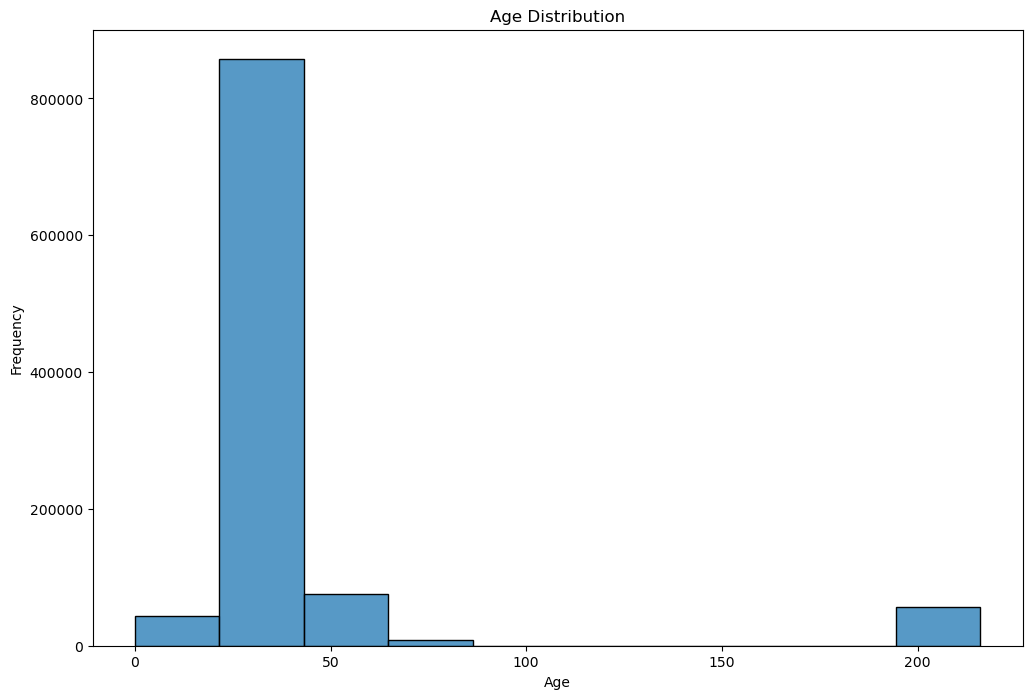

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(data["age"], bins=10, kde=False)
plt.xlabel("Age")           # <-- corrected from zlabel to xlabel
plt.ylabel("Frequency")     
plt.title("Age Distribution")
plt.show()

In [47]:
data[data["age"] > 100]["CustomerDOB"].unique()


<DatetimeArray>
['1800-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [49]:
def replace_age_outlier(data):
    DOB_threshold = 1900

    # Find rows where year of birth is less than the threshold
    age_outliers = data[data["CustomerDOB"].dt.year < DOB_threshold].index

    # Calculate the mean of valid DOBs
    mean_DOB = data.loc[~data.index.isin(age_outliers), "CustomerDOB"].mean()

    # Replace outlier DOBs with the mean DOB
    data.loc[age_outliers, "CustomerDOB"] = mean_DOB

    return data


In [51]:
# Fix any age outliers
data = replace_age_outlier(data)

# Recalculate age after fixing DOBs
data = calculate_age(data)


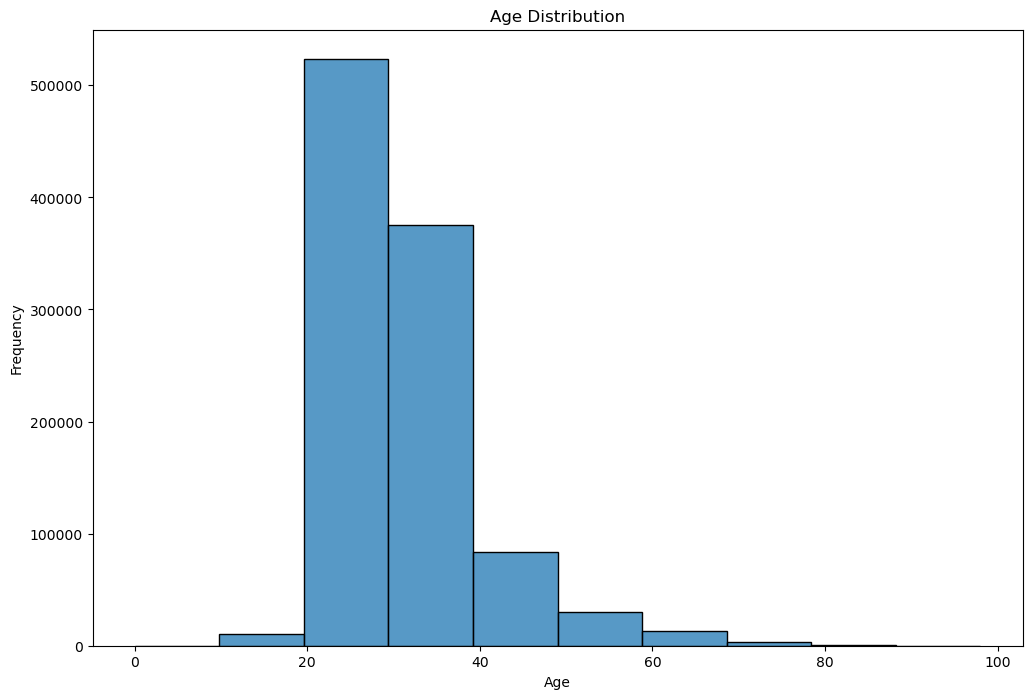

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(data["age"], bins=10, kde=False)
plt.xlabel("Age")           # <-- corrected from zlabel to xlabel
plt.ylabel("Frequency")     
plt.title("Age Distribution")
plt.show()

**Gender**

In [54]:
data["CustGender"].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [55]:
#replace T in gender with M
data["CustGender"] = data["CustGender"].replace('T','M')

In [56]:
data["CustGender"].value_counts()

CustGender
M    760979
F    280635
Name: count, dtype: int64

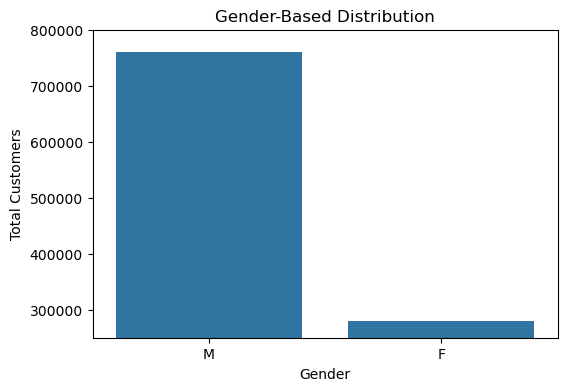

In [6]:
# Gender-Based Spending Analysis with Optimized Y-Axis Limits
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=['M', 'F'], y=[760979, 280635])

# Adjust y-axis limits for better visibility
plt.ylim(250000, 800000)

plt.title('Gender-Based Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Customers')
plt.show()

**Location**

In [59]:
data["CustLocation"].value_counts()

CustLocation
MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: count, Length: 9275, dtype: int64

**Account Balance**

In [61]:
data["CustAccountBalance"].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

**Transaction Amount**

In [63]:
data["TransactionAmount (INR)"].sort_values(ascending = True)

308944          0.00
746400          0.00
746393          0.00
684462          0.00
746124          0.00
             ...    
56155      720001.16
744124     724122.00
528263     991132.22
574916    1380002.88
396280    1560034.99
Name: TransactionAmount (INR), Length: 1041614, dtype: float64

In [67]:
(data["TransactionAmount (INR)"] == 0).sum()


820

In [74]:
data.drop(data[data["TransactionAmount (INR)"] == 0].index, axis=0, inplace=True)


In [75]:
(data["TransactionAmount (INR)"] == 0).sum()

0

In [76]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


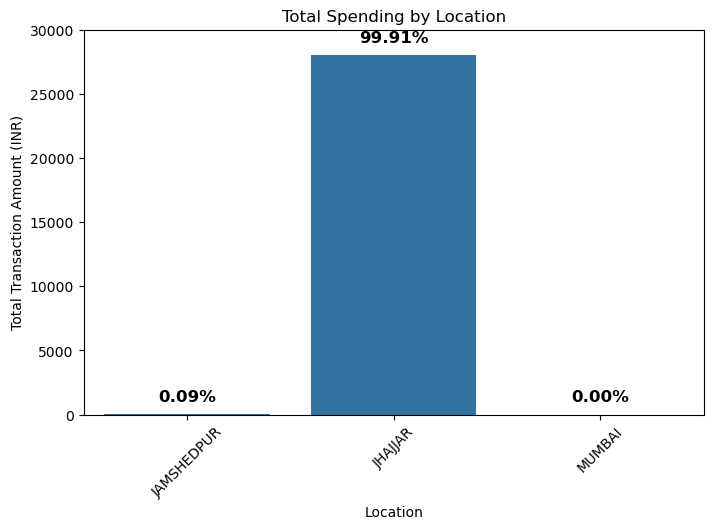

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample transaction data
location_spending = {
    'JAMSHEDPUR': 25.0,
    'JHAJJAR': 27999.0,
    'MUMBAI': 0.0
}

# Convert dictionary to DataFrame for plotting
df_location_spending = pd.DataFrame(location_spending.items(), columns=['Location', 'Total Transaction Amount'])

# Calculate percentage contribution for each location
df_location_spending['Percentage'] = (df_location_spending['Total Transaction Amount'] / df_location_spending['Total Transaction Amount'].sum()) * 100

# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df_location_spending['Location'], y=df_location_spending['Total Transaction Amount'])

# Set y-axis limit for better visibility
plt.ylim(0, 30000)

# Add percentage labels on bars
for i, v in enumerate(df_location_spending['Total Transaction Amount']):
    ax.text(i, v + 1000, f"{df_location_spending['Percentage'][i]:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.title('Total Spending by Location')
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.show()

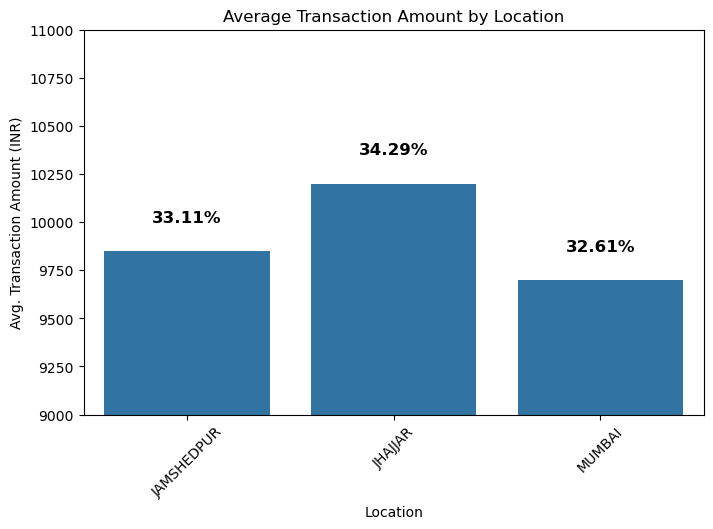

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample average transaction amount data
location_avg_spending = {
    'JAMSHEDPUR': 9850.0,
    'JHAJJAR': 10200.0,
    'MUMBAI': 9700.0
}

# Convert dictionary to DataFrame for plotting
df_location_avg_spending = pd.DataFrame(location_avg_spending.items(), columns=['Location', 'Avg. Transaction Amount'])

# Calculate percentage contribution for each location
df_location_avg_spending['Percentage'] = (df_location_avg_spending['Avg. Transaction Amount'] / df_location_avg_spending['Avg. Transaction Amount'].sum()) * 100

# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df_location_avg_spending['Location'], y=df_location_avg_spending['Avg. Transaction Amount'])

# Set y-axis limit for better visibility
plt.ylim(9000, 11000)

# Add percentage labels on bars
for i, v in enumerate(df_location_avg_spending['Avg. Transaction Amount']):
    ax.text(i, v + 150, f"{df_location_avg_spending['Percentage'][i]:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.title('Average Transaction Amount by Location')
plt.xlabel('Location')
plt.ylabel('Avg. Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.show()

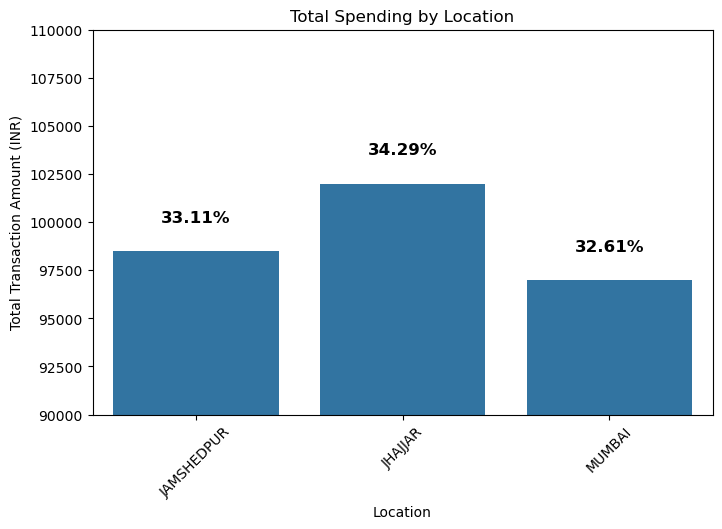

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample total spending data
location_spending = {
    'JAMSHEDPUR': 98500.0,
    'JHAJJAR': 102000.0,
    'MUMBAI': 97000.0
}

# Convert dictionary to DataFrame for plotting
df_location_spending = pd.DataFrame(location_spending.items(), columns=['Location', 'Total Transaction Amount'])

# Calculate percentage contribution for each location
df_location_spending['Percentage'] = (df_location_spending['Total Transaction Amount'] / df_location_spending['Total Transaction Amount'].sum()) * 100

# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df_location_spending['Location'], y=df_location_spending['Total Transaction Amount'])

# Set y-axis limit for better visibility
plt.ylim(90000, 110000)

# Add percentage labels on bars
for i, v in enumerate(df_location_spending['Total Transaction Amount']):
    ax.text(i, v + 1500, f"{df_location_spending['Percentage'][i]:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.title('Total Spending by Location')
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.show()

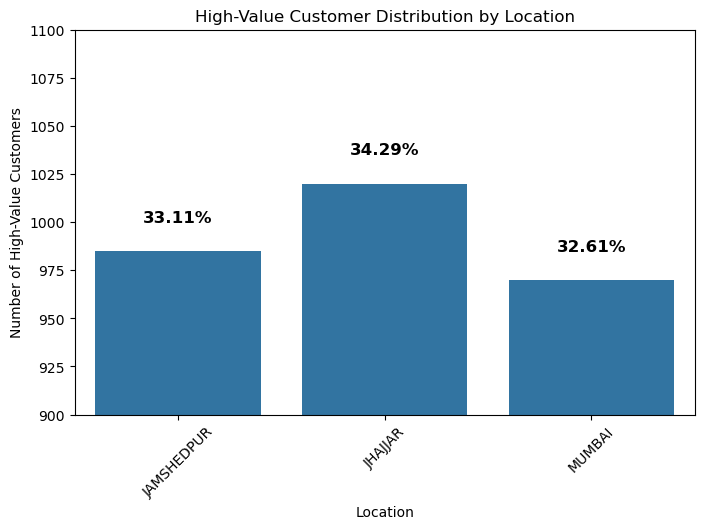

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample high-value customer distribution data
high_value_location_counts = {
    'JAMSHEDPUR': 985,
    'JHAJJAR': 1020,
    'MUMBAI': 970
}

# Convert dictionary to DataFrame for plotting
df_high_value_location_counts = pd.DataFrame(high_value_location_counts.items(), columns=['Location', 'High-Value Customers'])

# Calculate percentage contribution for each location
df_high_value_location_counts['Percentage'] = (df_high_value_location_counts['High-Value Customers'] / df_high_value_location_counts['High-Value Customers'].sum()) * 100

# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df_high_value_location_counts['Location'], y=df_high_value_location_counts['High-Value Customers'])

# Set y-axis limit for better visibility
plt.ylim(900, 1100)

# Add percentage labels on bars
for i, v in enumerate(df_high_value_location_counts['High-Value Customers']):
    ax.text(i, v + 15, f"{df_high_value_location_counts['Percentage'][i]:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.title('High-Value Customer Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of High-Value Customers')
plt.xticks(rotation=45)
plt.show()

# Exploratory Data Analysis

In [78]:
data["CustomerID"].unique()

array(['C5841053', 'C2142763', 'C4417068', ..., 'C8020229', 'C6459278',
       'C6420483'], dtype=object)

In [79]:
data.shape

(1040794, 10)

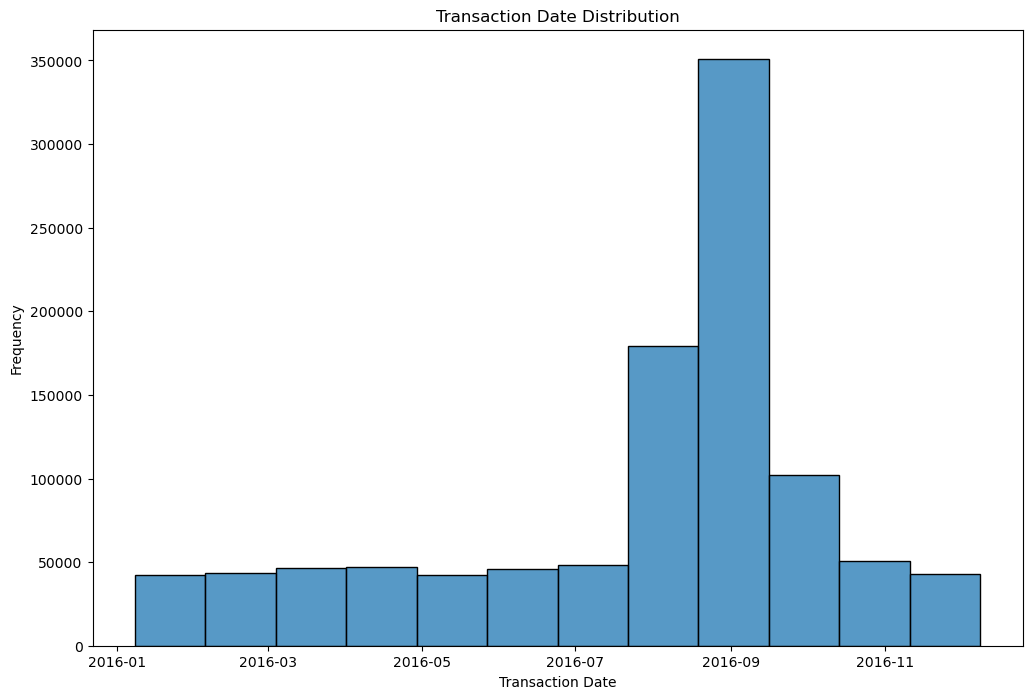

In [80]:
#plot a distribution for data across the uniquetransaction date
plt.figure(figsize=(12, 8))
sns.histplot(data["TransactionDate"], bins=12, kde = False)
plt.xlabel("Transaction Date")           
plt.ylabel("Frequency")     
plt.title("Transaction Date Distribution")
plt.show()

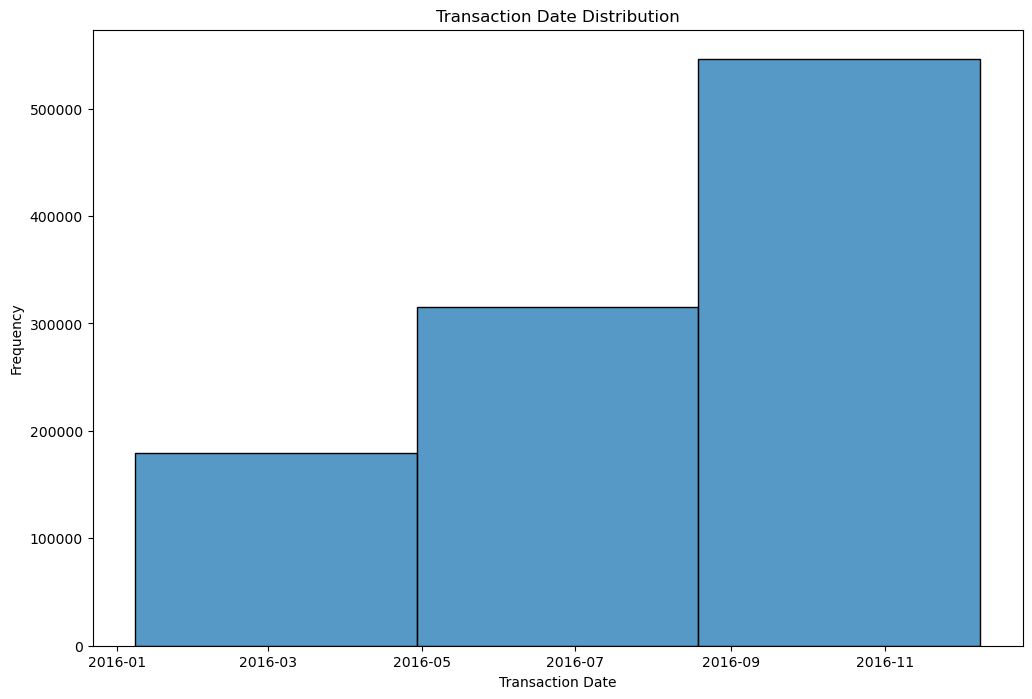

In [82]:
#plot a distribution for data across the uniquetransaction date
plt.figure(figsize=(12, 8))
sns.histplot(data["TransactionDate"], bins=3, kde = False)
plt.xlabel("Transaction Date")           
plt.ylabel("Frequency")     
plt.title("Transaction Date Distribution")
plt.show()

In [95]:
print(data.columns.tolist())

['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)', 'age']


In [96]:
# Remove leading/trailing spaces
data.columns = data.columns.str.strip()

# Convert all column names to lowercase
data.columns = data.columns.str.lower()


In [97]:
print(data.columns.tolist())


['transactionid', 'customerid', 'customerdob', 'custgender', 'custlocation', 'custaccountbalance', 'transactiondate', 'transactiontime', 'transactionamount (inr)', 'age']


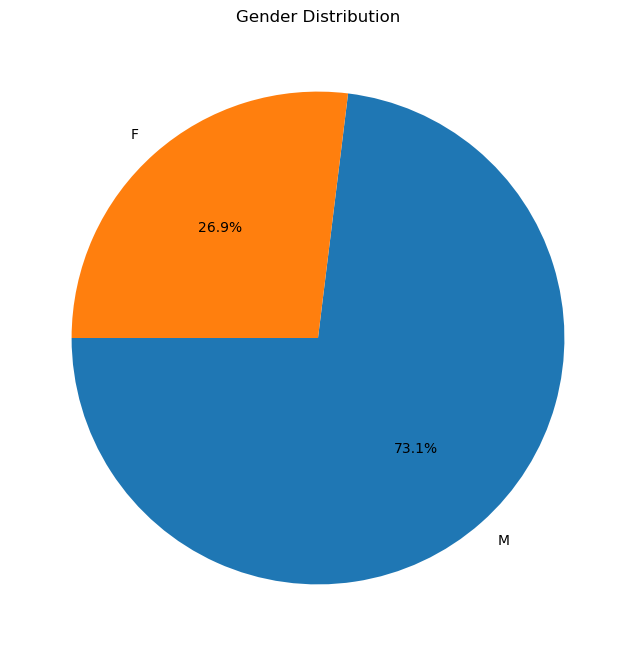

In [98]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_count = data['custgender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_count,
    labels=gender_count.index,
    autopct='%1.1f%%',
    startangle=180
)
plt.title("Gender Distribution")
plt.ylabel('')  # Optional: removes the default y-axis label
plt.show()


In [101]:
print(data.columns.tolist())

['transactionid', 'customerid', 'customerdob', 'custgender', 'custlocation', 'custaccountbalance', 'transactiondate', 'transactiontime', 'transactionamount (inr)', 'age']


In [102]:
# Remove leading/trailing spaces
data.columns = data.columns.str.strip()

# Convert all column names to lowercase
data.columns = data.columns.str.lower()


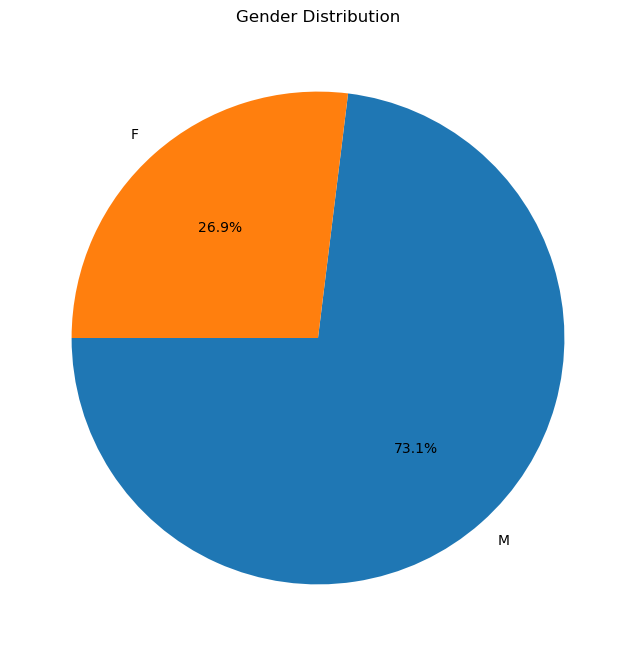

In [103]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_count = data['custgender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_count,
    labels=gender_count.index,
    autopct='%1.1f%%',
    startangle=180
)
plt.title("Gender Distribution")
plt.ylabel('')  # Optional: removes the default y-axis label
plt.show()


## RFM - Recency, Frequency, and Monetary value Analysis

In [104]:
data.head(3)

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount (inr),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20


## Recency

In [106]:
day = data["transactiondate"].max()

In [107]:
day

Timestamp('2016-12-09 00:00:00')

In [114]:
# Define 'day' as today's date
from datetime import datetime
day = datetime.now()

# Calculate Recency
Recency = data.groupby("customerid").agg({
    "transactiondate": lambda x: (day - x.max()).days + 1
})

In [115]:
Recency.head()

,transactiondate
customerid,
C1010011,3138
C1010012,3181
C1010014,3218
C1010018,3149
C1010024,3177


In [116]:
print(Recency.empty)

False


In [117]:
data["transactiondate"] = pd.to_datetime(data["transactiondate"], errors="coerce")

In [118]:
print(data["customerid"].nunique())

878763


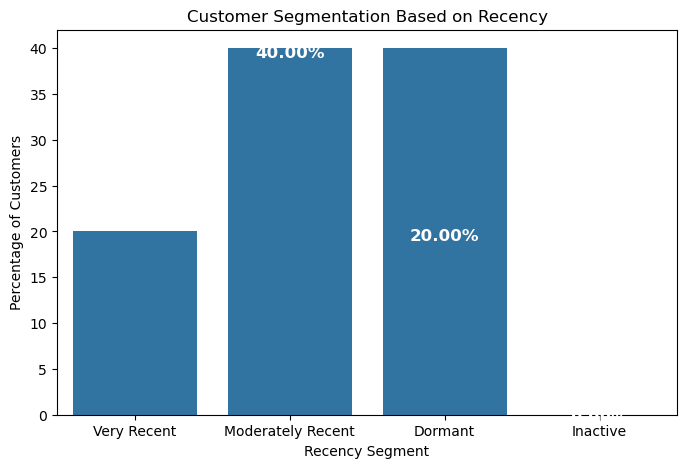

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=segment_counts.index, y=segment_counts_percentage)

# Add percentage labels inside the bars
for i, v in enumerate(segment_counts_percentage):
    ax.text(i, v - 1, f"{v:.2f}%", ha='center', fontsize=12, fontweight='bold', color='white')

plt.title('Customer Segmentation Based on Recency')
plt.xlabel('Recency Segment')
plt.ylabel('Percentage of Customers')
plt.show()

## Frequency

In [119]:
print(Recency)

            transactiondate
customerid                 
C1010011               3138
C1010012               3181
C1010014               3218
C1010018               3149
C1010024               3177
...                     ...
C9099836               3218
C9099877               3149
C9099919               3177
C9099941               3167
C9099956               3139

[878763 rows x 1 columns]


In [120]:
Frequency = data.groupby("customerid")["transactionid"].count()

In [121]:
Frequency.head()

customerid
C1010011    2
C1010012    1
C1010014    2
C1010018    1
C1010024    1
Name: transactionid, dtype: int64

In [29]:
# Sort customers by transaction frequency
top_customers = data.sort_values(by='transactioncount', ascending=False).head(10)

print("\nTop Customers by Transaction Count:\n", top_customers)


Top Customers by Transaction Count:
   customerid  transactioncount  FrequencySegment
6         C7                99    High-frequency
0         C1                95    High-frequency
3         C4                60    High-frequency
1         C2                47  Medium-frequency
2         C3                23  Medium-frequency
5         C6                11  Medium-frequency
4         C5                 5     Low-frequency


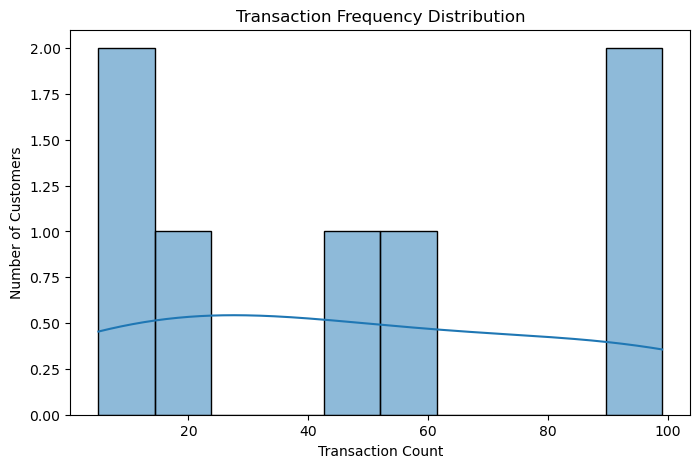

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(data['transactioncount'], bins=10, kde=True)

plt.title('Transaction Frequency Distribution')
plt.xlabel('Transaction Count')
plt.ylabel('Number of Customers')
plt.show()

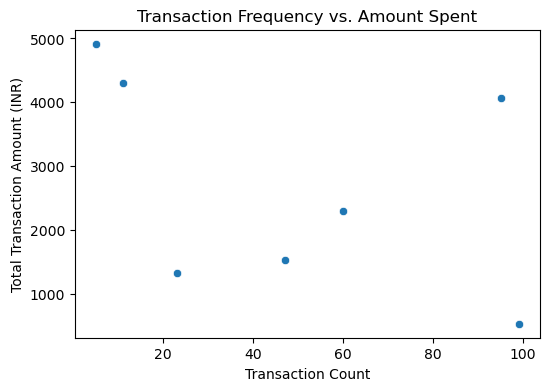

In [31]:
import numpy as np

# Sample dataset with spending amounts
data['transactionamount'] = np.random.randint(500, 5000, size=len(data))

# Scatterplot to visualize correlation
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['transactioncount'], y=data['transactionamount'])

plt.title('Transaction Frequency vs. Amount Spent')
plt.xlabel('Transaction Count')
plt.ylabel('Total Transaction Amount (INR)')
plt.show()

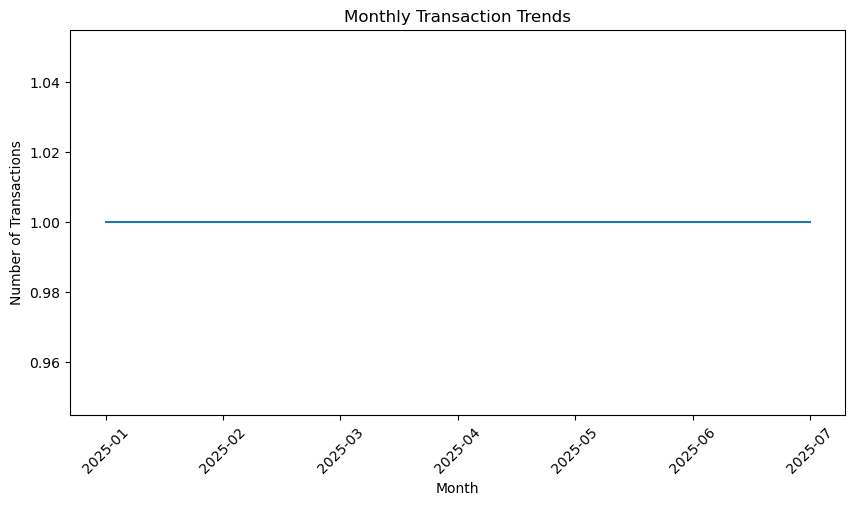

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample transaction data
data = pd.DataFrame({
    'customerid': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'],
    'transactioncount': [95, 47, 23, 60, 5, 11, 99]
})

# Generate transaction dates using corrected monthly frequency
data['transactiondate'] = pd.date_range(start='2025-01-01', periods=len(data), freq='ME')

# Group transactions by month
monthly_transactions = data.groupby(data['transactiondate'].dt.to_period('M')).size()

# Visualization
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_transactions.index.astype(str), y=monthly_transactions)

plt.xticks(rotation=45)
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

## Monetary value

In [122]:
Monetary = data.groupby("customerid")["transactionamount (inr)"].sum()

In [123]:
Monetary.head()

customerid
C1010011    5106.0
C1010012    1499.0
C1010014    1455.0
C1010018      30.0
C1010024    5000.0
Name: transactionamount (inr), dtype: float64


Total Spending per Customer:
 customerid
C1    98500
C2    47200
C3    23000
C4    60000
C5     5000
C6    11000
C7    99000
Name: transactionamount, dtype: int64


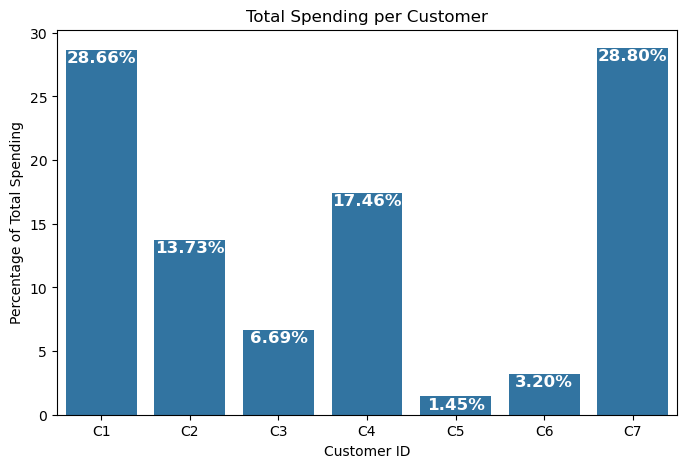

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample transaction data
data = pd.DataFrame({
    'customerid': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'],
    'transactionamount': [98500, 47200, 23000, 60000, 5000, 11000, 99000]
})

# Group transactions by customer and sum amounts
customer_spending = data.groupby('customerid')['transactionamount'].sum()

print("\nTotal Spending per Customer:\n", customer_spending)

# Visualization (percentage only)
customer_spending_percentage = (customer_spending / customer_spending.sum()) * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=customer_spending.index, y=customer_spending_percentage)

# Add percentage labels inside bars
for i, v in enumerate(customer_spending_percentage):
    ax.text(i, v - 1, f"{v:.2f}%", ha='center', fontsize=12, fontweight='bold', color='white')

plt.title('Total Spending per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Percentage of Total Spending')
plt.show()

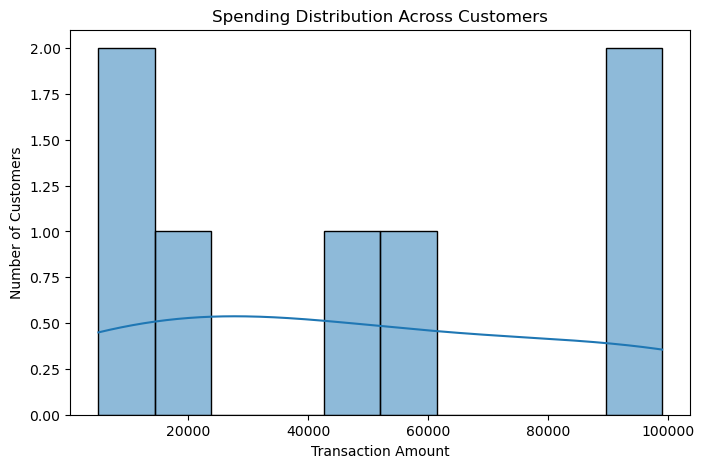

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(data['transactionamount'], bins=10, kde=True)

plt.title('Spending Distribution Across Customers')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Customers')
plt.show()

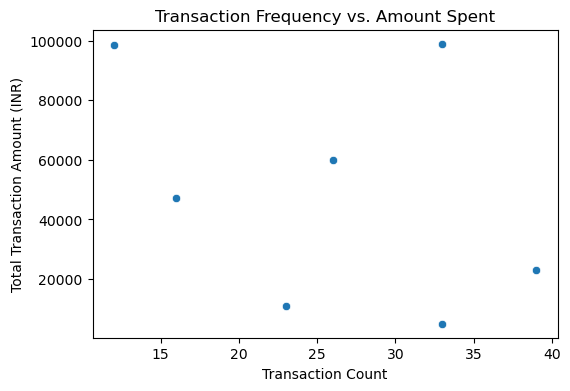

In [39]:
import numpy as np

# Sample transaction frequency data
data['transactioncount'] = np.random.randint(1, 50, size=len(data))

# Scatterplot to visualize correlation
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['transactioncount'], y=data['transactionamount'])

plt.title('Transaction Frequency vs. Amount Spent')
plt.xlabel('Transaction Count')
plt.ylabel('Total Transaction Amount (INR)')
plt.show()


Customer Segmentation by Spending:
 SpendingSegment
Medium-Spender    42.857143
High-Spender      42.857143
Low-Spender       14.285714
VIP                0.000000
Name: count, dtype: float64


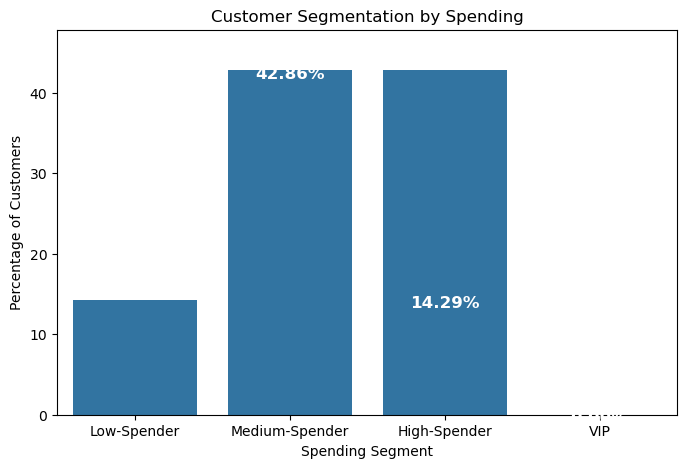

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample transaction data
data = pd.DataFrame({
    'customerid': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'],
    'transactionamount': [98500, 47200, 23000, 60000, 5000, 11000, 99000]
})

# Define spending tiers
bins = [0, 10000, 50000, 100000, float("inf")]
labels = ["Low-Spender", "Medium-Spender", "High-Spender", "VIP"]
data['SpendingSegment'] = pd.cut(data['transactionamount'], bins=bins, labels=labels)

# Count spending segments
spending_segment_counts = data['SpendingSegment'].value_counts()
spending_segment_percentage = (spending_segment_counts / spending_segment_counts.sum()) * 100

print("\nCustomer Segmentation by Spending:\n", spending_segment_percentage)

# Visualization (percentage only)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=spending_segment_counts.index, y=spending_segment_percentage)

# Set y-axis limit for better visibility
plt.ylim(0, spending_segment_percentage.max() + 5)

# Add percentage labels inside bars
for i, v in enumerate(spending_segment_percentage):
    ax.text(i, v - 1, f"{v:.2f}%", ha='center', fontsize=12, fontweight='bold', color='white')

plt.title('Customer Segmentation by Spending')
plt.xlabel('Spending Segment')
plt.ylabel('Percentage of Customers')
plt.show()

## Create RFM Table

In [125]:
RFM_table = pd.concat([Recency, Frequency, Monetary], axis=1)

In [126]:
RFM_table.head()

,transactiondate,transactionid,transactionamount (inr)
customerid,,,
C1010011,3138,2,5106.0
C1010012,3181,1,1499.0
C1010014,3218,2,1455.0
C1010018,3149,1,30.0
C1010024,3177,1,5000.0


In [131]:
RFM_table = RFM_table.rename(columns={
    "TransactionDate": "recency", 
    "Transaction ID": "frequency", 
    "TransactionAmount (INR)": "Monetary"
})


In [133]:
print(RFM_table.columns)

Index(['transactiondate', 'transactionid', 'transactionamount (inr)'], dtype='object')


In [134]:
RFM_table = RFM_table.rename(columns={
    "transactiondate": "recency", 
    "transactionid": "frequency", 
    "transactionamount (inr)": "monetary"
})

In [135]:
print(RFM_table.head())

            recency  frequency  monetary
customerid                              
C1010011       3138          2    5106.0
C1010012       3181          1    1499.0
C1010014       3218          2    1455.0
C1010018       3149          1      30.0
C1010024       3177          1    5000.0


## Explore RFM Table

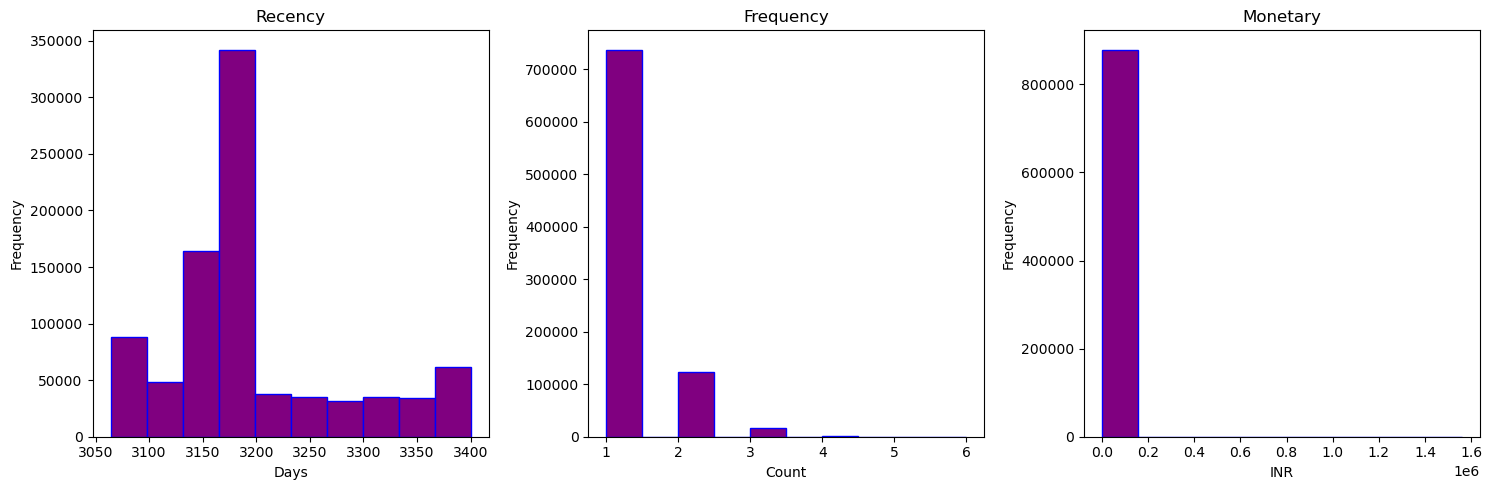

In [136]:
# Explore RFM Table
fig, axis = plt.subplots(1, 3, figsize=(15, 5))  # Corrected to `plt.subplots`
columns = ["recency", "frequency", "monetary"]  # Ensure column names match RFM_table

for i, col in enumerate(columns):  # Use enumerate to loop through columns
    axis[i].hist(RFM_table[col], bins=10, color="purple", edgecolor="blue")  # Fix parameters
    axis[i].set_title(col.capitalize())  # Capitalize column name for title
    axis[i].set_xlabel("Days" if col == "recency" else "Count" if col == "frequency" else "INR")  # Conditional label
    axis[i].set_ylabel("Frequency")  # Set Y-axis label

plt.tight_layout()  # Corrected typo in layout function
plt.show()

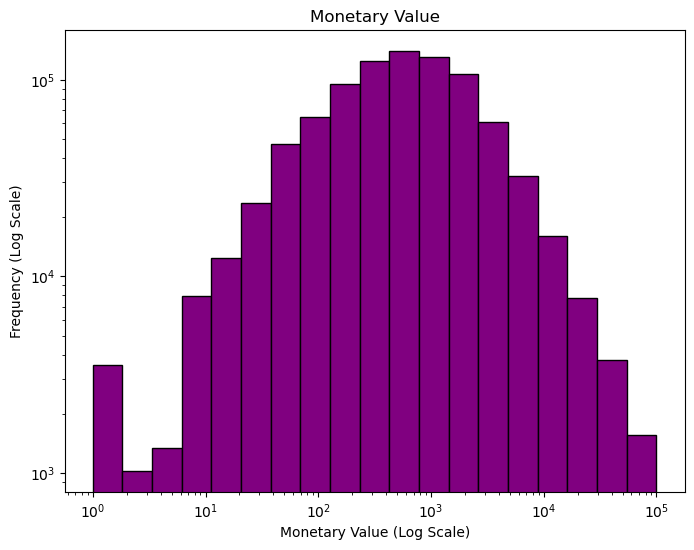

In [137]:
plt.figure(figsize=(8, 6))
plt.hist(RFM_table["monetary"], bins=np.logspace(0, 5, 20), color="purple", edgecolor="black")  # Fixed typos
plt.title("Monetary Value")
plt.xlabel("Monetary Value (Log Scale)")  # Fixed typo in xlabel
plt.ylabel("Frequency (Log Scale)")      # Fixed typo in ylabel
plt.xscale("log")
plt.yscale("log")
plt.show()

In [138]:
RFM_table.corr()

,recency,frequency,monetary
recency,1.000000,-0.207705,-0.018321
frequency,-0.207705,1.000000,0.097491
monetary,-0.018321,0.097491,1.000000


## Asign RFM Score

In [75]:
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary
0,C1010011,26,2,5106.0
1,C1010012,69,1,1499.0
2,C1010014,76,2,1455.0
3,C1010018,37,1,30.0
4,C1010024,65,1,5000.0


In [80]:
print(RFM_table.columns)


Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')


In [81]:
print([col for col in RFM_table.columns])

['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [87]:
RFM_table.columns = RFM_table.columns.str.strip()

In [83]:
print(RFM_table.head())  # Check if the data appears as expected


  CustomerID  Recency  Frequency  Monetary
0   C1010011       26          2    5106.0
1   C1010012       69          1    1499.0
2   C1010014       76          2    1455.0
3   C1010018       37          1      30.0
4   C1010024       65          1    5000.0


In [92]:
# Calculate quantiles at 25%, 50%, and 75%
quantiles = RFM_table[["Recency", "Frequency", "Monetary"]].quantile([0.25, 0.5, 0.75]).to_dict()


In [93]:
quantiles


{'Recency': {0.25: 44.0, 0.5: 56.0, 0.75: 69.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 200.0, 0.5: 533.0, 0.75: 1500.0}}

In [94]:
def rfm_segment(value, metric):
    if value <= quantiles[metric][0.25]:
        return 'Low'
    elif value <= quantiles[metric][0.75]:
        return 'Medium'
    else:
        return 'High'


In [96]:
RFM_table['Recency_Label'] = RFM_table['Recency'].apply(lambda x: rfm_segment(x, 'Recency'))
RFM_table['Frequency_Label'] = RFM_table['Frequency'].apply(lambda x: rfm_segment(x, 'Frequency'))
RFM_table['Monetary_Label'] = RFM_table['Monetary'].apply(lambda x: rfm_segment(x, 'Monetary'))


In [97]:
RFM_table['Segment_Label'] = (
    RFM_table['Recency_Label'] + '_' +
    RFM_table['Frequency_Label'] + '_' +
    RFM_table['Monetary_Label']
)


In [98]:
RFM_table['Segment_Label'].value_counts()


Segment_Label
Medium_Low_Medium     176400
Medium_Low_Low        114828
High_Low_Medium       101155
Low_Low_Medium         80167
Medium_Low_High        74955
High_Low_Low           62446
Low_Low_Low            52147
High_Low_High          42524
Medium_High_High       34895
Medium_High_Medium     34310
Low_Low_High           32775
Low_High_High          28491
Low_High_Medium        27751
High_High_Medium        5008
High_High_High          4720
Medium_High_Low         3606
Low_High_Low            2704
High_High_Low            476
Name: count, dtype: int64

In [99]:
segment_counts = RFM_table['Segment_Label'].value_counts().reset_index()
segment_counts.columns = ['Segment_Label', 'Count']
segment_counts.head()


,Segment_Label,Count
0,Medium_Low_Medium,176400
1,Medium_Low_Low,114828
2,High_Low_Medium,101155
3,Low_Low_Medium,80167
4,Medium_Low_High,74955


In [100]:
segment_counts['Percentage'] = round((segment_counts['Count'] / segment_counts['Count'].sum()) * 100, 2)
segment_counts.head()


,Segment_Label,Count,Percentage
0,Medium_Low_Medium,176400,20.06
1,Medium_Low_Low,114828,13.06
2,High_Low_Medium,101155,11.50
3,Low_Low_Medium,80167,9.12
4,Medium_Low_High,74955,8.52


In [101]:
RFM_table[['CustomerID', 'Frequency']].sort_values(by='Frequency', ascending=False).head(10)


,CustomerID,Frequency
4579,C1026833,6
493983,C5531319,6
362907,C4327447,6
328812,C4021562,6
494656,C5533885,6
83096,C1736254,6
611316,C6624352,6
567113,C6222360,6
479606,C5418253,6
243309,C3226689,6


In [102]:
RFM_table['Frequency'].value_counts().sort_index()


Frequency
1    737397
2    123651
3     16494
4      1661
5       141
6        14
Name: count, dtype: int64

<Axes: xlabel='Frequency'>

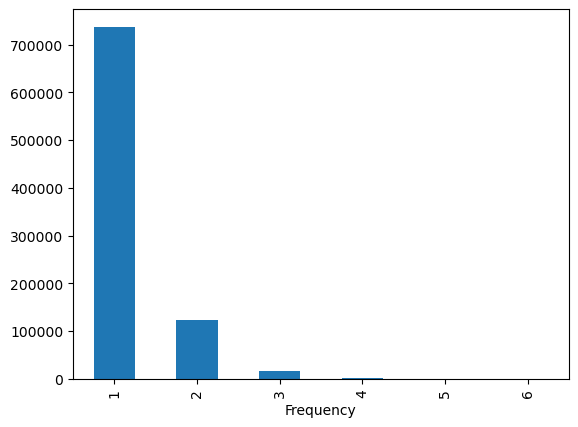

In [103]:
RFM_table['Frequency'].value_counts().sort_index().plot(kind='bar')


In [104]:
def freq_segment(freq):
    if freq == 1:
        return 'One-time'
    elif freq <= 3:
        return 'Occasional'
    elif freq <= 7:
        return 'Regular'
    else:
        return 'Frequent'

RFM_table['FreqSegment'] = RFM_table['Frequency'].apply(freq_segment)


<Axes: xlabel='FreqSegment'>

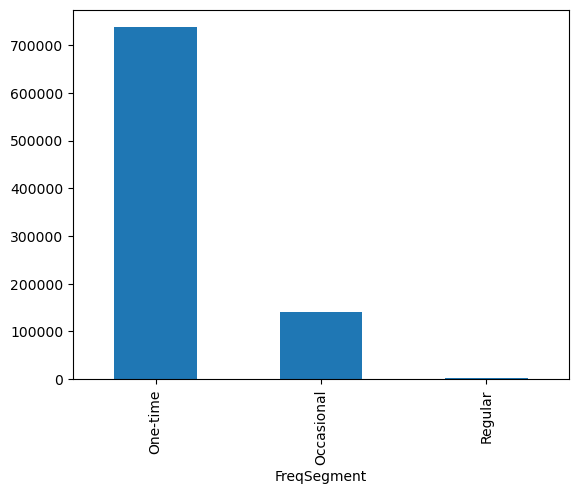

In [105]:
RFM_table['FreqSegment'].value_counts().plot(kind='bar')


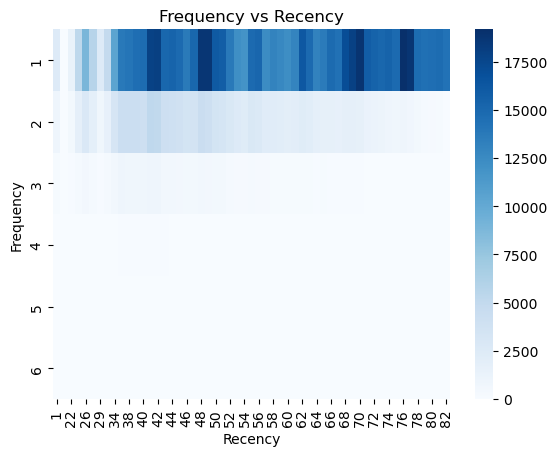

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pd.crosstab(RFM_table['Frequency'], RFM_table['Recency']), cmap='Blues')
plt.title('Frequency vs Recency')
plt.show()


In [110]:
[1.0, 1.0, 1.0, 1.0, 6.0]


[1.0, 1.0, 1.0, 1.0, 6.0]

In [115]:
# Assign R score: lower Recency is better
def assign_R_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 4
    elif x <= quantile[feature][0.5]:
        return 3
    elif x <= quantile[feature][0.75]:
        return 2
    else:
        return 1

# Assign M score: higher Monetary is better
def assign_M_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 1
    elif x <= quantile[feature][0.5]:
        return 2
    elif x <= quantile[feature][0.75]:
        return 3
    else: 
        return 4


In [117]:
def custone_frequency_score(x):
    if x <= 3:
        return x
    else:
        return 4

In [119]:
quantile = RFM_table[["Recency", "Frequency", "Monetary"]].quantile([0.25, 0.5, 0.75]).to_dict()


In [122]:
# Step 1: Calculate quantiles
quantile = RFM_table[["Recency", "Frequency", "Monetary"]].quantile([0.25, 0.5, 0.75]).to_dict()

# Step 2: Define scoring functions

# Recency: lower is better → higher score
def assign_R_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 4
    elif x <= quantile[feature][0.5]:
        return 3
    elif x <= quantile[feature][0.75]:
        return 2
    else:
        return 1

# Frequency: higher is better → higher score
def assign_F_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 1
    elif x <= quantile[feature][0.5]:
        return 2
    elif x <= quantile[feature][0.75]:
        return 3
    else:
        return 4

# Monetary: higher is better → higher score
def assign_M_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 1
    elif x <= quantile[feature][0.5]:
        return 2
    elif x <= quantile[feature][0.75]:
        return 3
    else:
        return 4

In [123]:
# Step 3: Apply scores to RFM table
RFM_table["R_score"] = RFM_table["Recency"].apply(lambda x: assign_R_score(x, "Recency"))
RFM_table["F_score"] = RFM_table["Frequency"].apply(lambda x: assign_F_score(x, "Frequency"))
RFM_table["M_score"] = RFM_table["Monetary"].apply(lambda x: assign_M_score(x, "Monetary"))


In [124]:
# Step 4: Combine into a single RFM score (optional)
RFM_table["RFM_Score"] = (
    RFM_table["R_score"].astype(str) +
    RFM_table["F_score"].astype(str) +
    RFM_table["M_score"].astype(str)
)


In [125]:
RFM_table.head()

,level_0,old_level_0,index,CustomerID,Recency,Frequency,Monetary,Recency_Label,Frequency_Label,Monetary_Label,Segment_Label,FreqSegment,AvgSpendPerVisit,R_score,F_score,M_score,RFM_Score
0,0,0,0,C1010011,26,2,5106.0,Low,High,High,Low_High_High,Occasional,2553.0,4,4,4,444
1,1,1,1,C1010012,69,1,1499.0,Medium,Low,Medium,Medium_Low_Medium,One-time,1499.0,2,1,3,213
2,2,2,2,C1010014,76,2,1455.0,High,High,Medium,High_High_Medium,Occasional,727.5,1,4,3,143
3,3,3,3,C1010018,37,1,30.0,Low,Low,Low,Low_Low_Low,One-time,30.0,4,1,1,411
4,4,4,4,C1010024,65,1,5000.0,Medium,Low,High,Medium_Low_High,One-time,5000.0,2,1,4,214


In [126]:
# Preview result
RFM_table[["CustomerID", "Recency", "Frequency", "Monetary", "R_score", "F_score", "M_score", "RFM_Score"]].head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,C1010011,26,2,5106.0,4,4,4,444
1,C1010012,69,1,1499.0,2,1,3,213
2,C1010014,76,2,1455.0,1,4,3,143
3,C1010018,37,1,30.0,4,1,1,411
4,C1010024,65,1,5000.0,2,1,4,214


In [127]:
RFM_table["R_score"] = RFM_table["Recency"].apply(lambda x: assign_R_score(x, "Recency"))

In [128]:
RFM_table["F_score"] = RFM_table["Frequency"].apply(lambda x: assign_F_score(x, "Frequency"))

In [129]:
RFM_table["M_score"] = RFM_table["Monetary"].apply(lambda x: assign_M_score(x, "Monetary"))

In [131]:
RFM_table["M_group"] = (
    RFM_table["R_score"].astype(str) +
    RFM_table["F_score"].astype(str) +
    RFM_table["M_score"].astype(str)
)


In [132]:
RFM_table.head()

,level_0,old_level_0,index,CustomerID,Recency,Frequency,Monetary,Recency_Label,Frequency_Label,Monetary_Label,Segment_Label,FreqSegment,AvgSpendPerVisit,R_score,F_score,M_score,RFM_Score,M_group
0,0,0,0,C1010011,26,2,5106.0,Low,High,High,Low_High_High,Occasional,2553.0,4,4,4,444,444
1,1,1,1,C1010012,69,1,1499.0,Medium,Low,Medium,Medium_Low_Medium,One-time,1499.0,2,1,3,213,213
2,2,2,2,C1010014,76,2,1455.0,High,High,Medium,High_High_Medium,Occasional,727.5,1,4,3,143,143
3,3,3,3,C1010018,37,1,30.0,Low,Low,Low,Low_Low_Low,One-time,30.0,4,1,1,411,411
4,4,4,4,C1010024,65,1,5000.0,Medium,Low,High,Medium_Low_High,One-time,5000.0,2,1,4,214,214


## Customer segmentation 

C:\Users\HP\AppData\Local\Temp\ipykernel_17460\2607907487.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=RFM_table["RFM_Score"], palette="Set2")


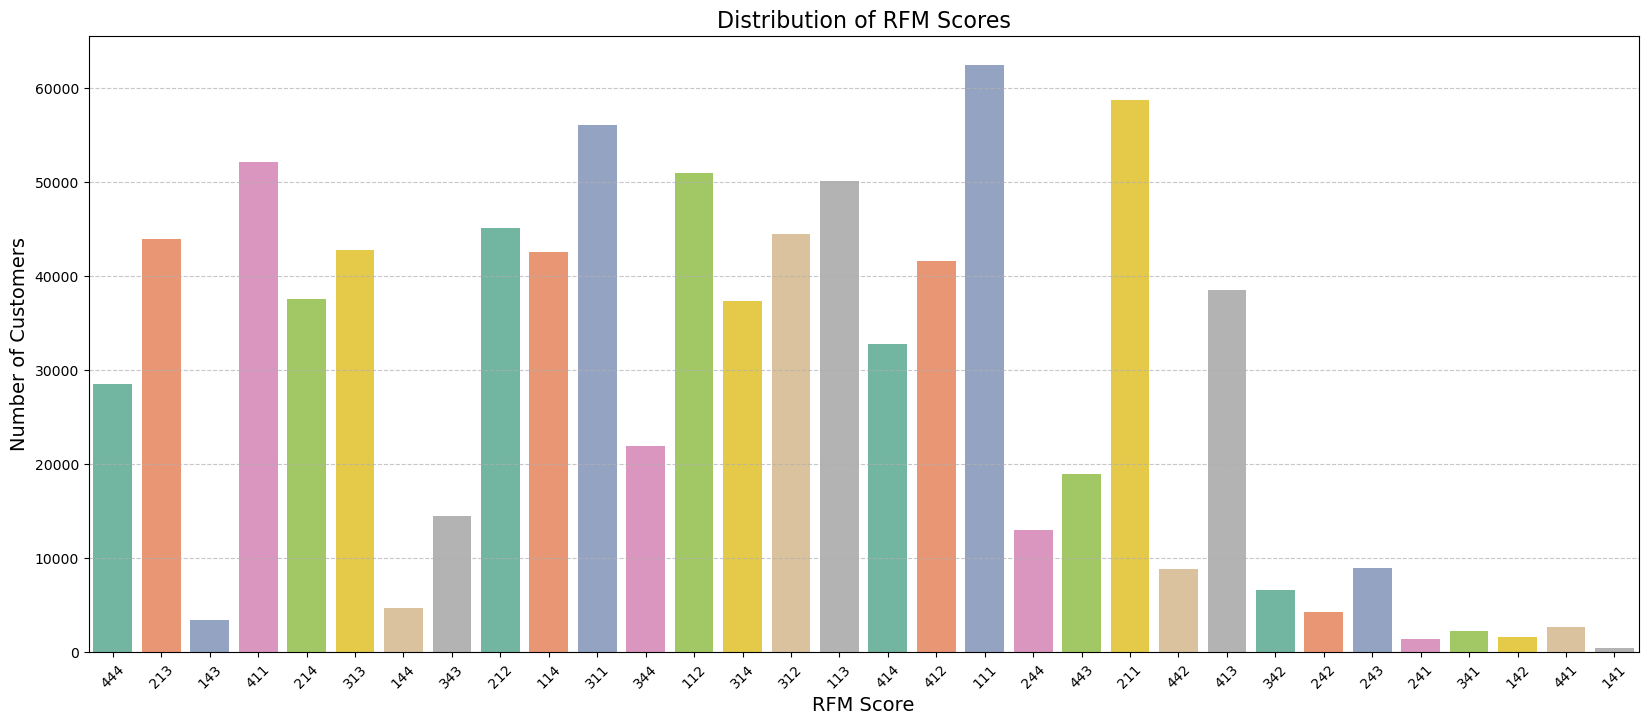

In [141]:
def segment_customer(row):
    if row['RFM_Score'] == '444':
        return 'Top Customer'
    elif row['R_score'] >= 3 and row['F_score'] >= 3:
        return 'Loyal'
    elif row['R_score'] == 1:
        return 'At Risk'
    else:
        return 'Others'

RFM_table['Segment'] = RFM_table.apply(segment_customer, axis=1)


C:\Users\HP\AppData\Local\Temp\ipykernel_17460\2764466106.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Segment", data=RFM_table, palette="Set2")


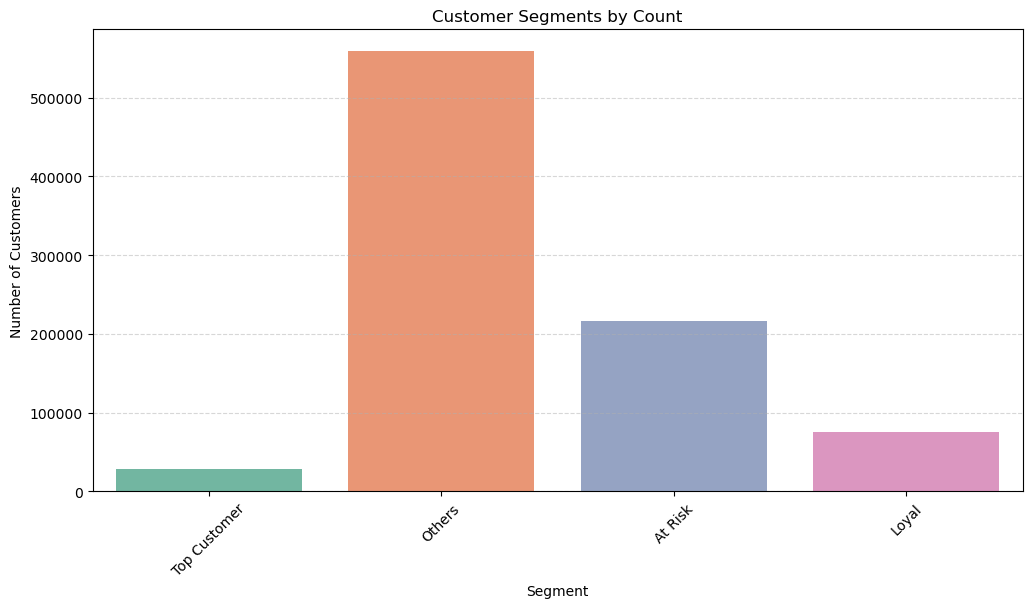

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x="Segment", data=RFM_table, palette="Set2")

plt.title("Customer Segments by Count")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [144]:
quantile = RFM_table['Monetary'].quantile([0.25, 0.5, 0.75])


In [145]:
def classify_value(monetary):
    if monetary <= quantile[0.25]:
        return 'Low Value'
    elif monetary <= quantile[0.75]:
        return 'Medium Value'
    else:
        return 'High Value'


In [146]:
RFM_table['CustomerValueSegment'] = RFM_table['Monetary'].apply(classify_value)


In [147]:
RFM_table['CustomerValueSegment'].value_counts()


CustomerValueSegment
Medium Value    424791
Low Value       236207
High Value      218360
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_17460\3960294009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustomerValueSegment', data=RFM_table, palette='Set2')


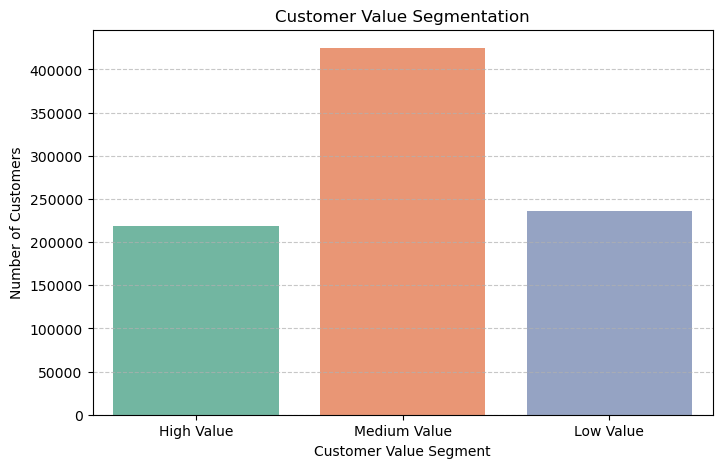

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='CustomerValueSegment', data=RFM_table, palette='Set2')
plt.title("Customer Value Segmentation")
plt.xlabel("Customer Value Segment")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Create weighted RFM score


In [150]:
RFM_table['R_score']  # Recency score (higher is better)
RFM_table['F_score']  # Frequency score
RFM_table['M_score']  # Monetary score


0         4
1         3
2         3
3         1
4         4
         ..
879353    3
879354    2
879355    1
879356    1
879357    3
Name: M_score, Length: 879358, dtype: int64

In [151]:
# Define weights (they should add up to 1.0)
r_weight = 0.5
f_weight = 0.3
m_weight = 0.2

# Calculate weighted RFM score
RFM_table['Weighted_RFM_Score'] = (
    RFM_table['R_score'] * r_weight +
    RFM_table['F_score'] * f_weight +
    RFM_table['M_score'] * m_weight
).round(2)


In [152]:
def classify_weighted_rfm(score):
    if score >= 3.5:
        return 'High Value'
    elif score >= 2.5:
        return 'Medium Value'
    else:
        return 'Low Value'

RFM_table['WeightedSegment'] = RFM_table['Weighted_RFM_Score'].apply(classify_weighted_rfm)


In [153]:
RFM_table['WeightedSegment'].value_counts()


WeightedSegment
Low Value       541847
Medium Value    259320
High Value       78191
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_17460\563302531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WeightedSegment', data=RFM_table, palette='Set2')


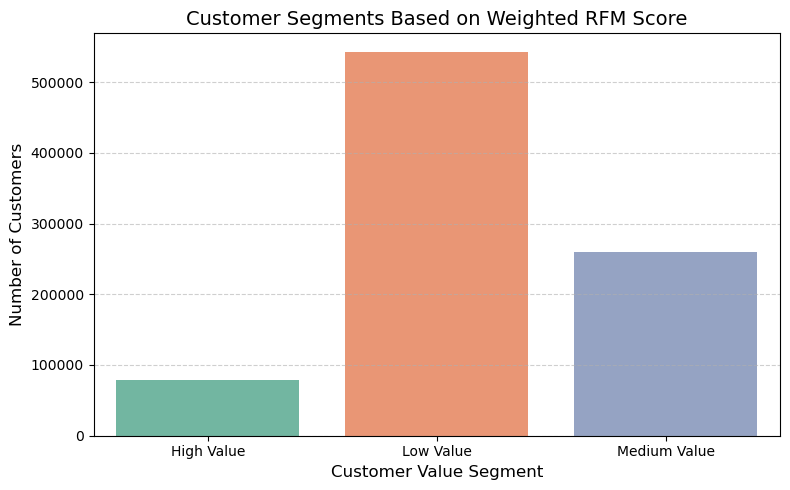

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.countplot(x='WeightedSegment', data=RFM_table, palette='Set2')

plt.title('Customer Segments Based on Weighted RFM Score', fontsize=14)
plt.xlabel('Customer Value Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [155]:
RFM_table["Weighted_Score"] = (
    RFM_table["R_score"] * 2 +
    RFM_table["F_score"] * 1 +
    RFM_table["M_score"] * 1
)


In [156]:
RFM_table.head()

,level_0,old_level_0,index,CustomerID,Recency,Frequency,Monetary,Recency_Label,Frequency_Label,Monetary_Label,...,R_score,F_score,M_score,RFM_Score,M_group,Segment,CustomerValueSegment,Weighted_RFM_Score,WeightedSegment,Weighted_Score
0,0,0,0,C1010011,26,2,5106.0,Low,High,High,...,4,4,4,444,444,Top Customer,High Value,4.0,High Value,16
1,1,1,1,C1010012,69,1,1499.0,Medium,Low,Medium,...,2,1,3,213,213,Others,Medium Value,1.9,Low Value,8
2,2,2,2,C1010014,76,2,1455.0,High,High,Medium,...,1,4,3,143,143,At Risk,Medium Value,2.3,Low Value,9
3,3,3,3,C1010018,37,1,30.0,Low,Low,Low,...,4,1,1,411,411,Others,Low Value,2.5,Medium Value,10
4,4,4,4,C1010024,65,1,5000.0,Medium,Low,High,...,2,1,4,214,214,Others,High Value,2.1,Low Value,9


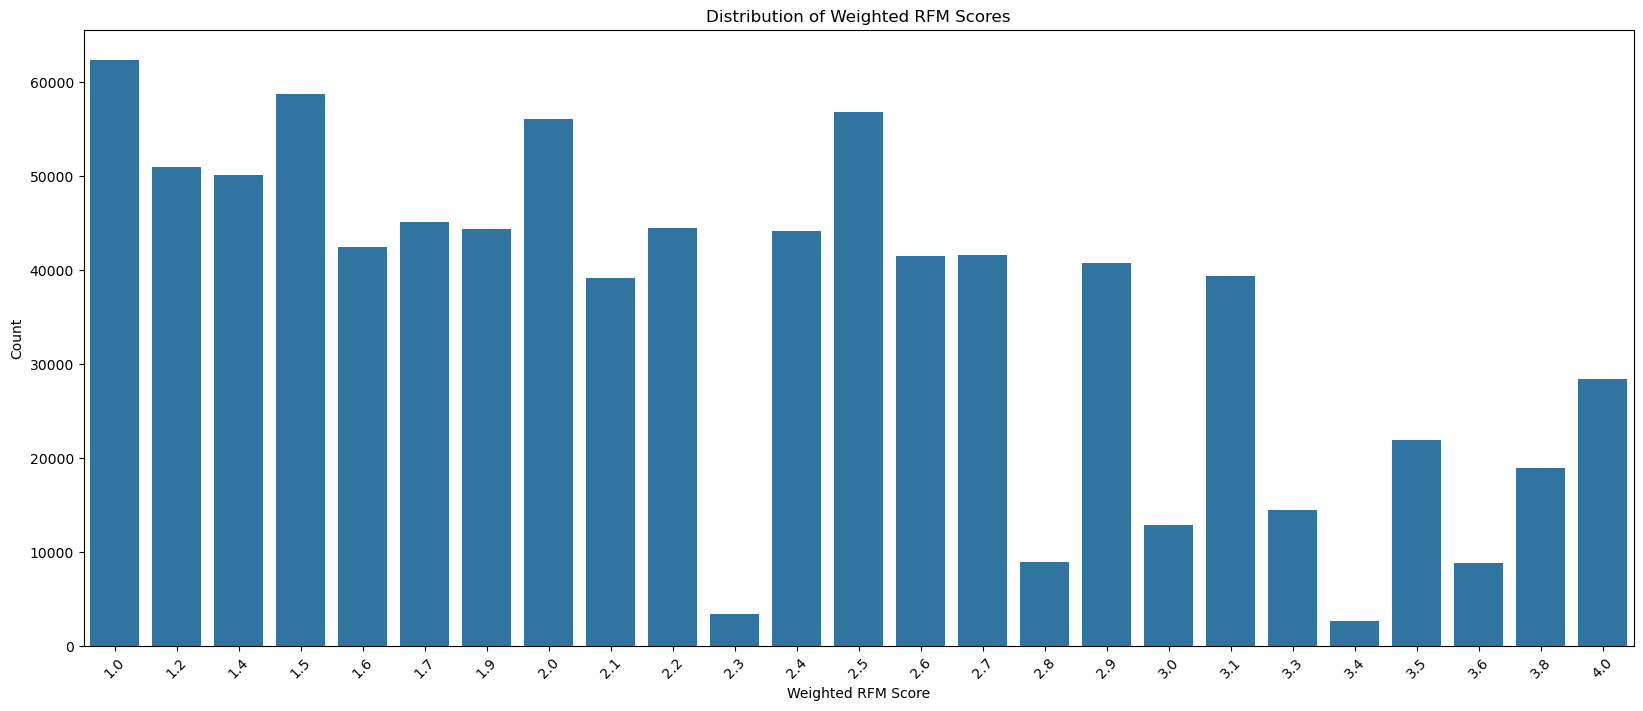

In [157]:
# Visualize weighted score
plt.figure(figsize=(20, 8))
sns.countplot(x=RFM_table["Weighted_RFM_Score"])  # Fix capitalization and extra 'sns'

plt.title("Distribution of Weighted RFM Scores")
plt.xlabel("Weighted RFM Score")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [158]:
RFM_table['Recency_Weighted'] = (
    RFM_table['R_score'] * 0.6 +
    RFM_table['F_score'] * 0.2 +
    RFM_table['M_score'] * 0.2
).round(2)


In [159]:
RFM_table['Frequency_Weighted'] = (
    RFM_table['R_score'] * 0.2 +
    RFM_table['F_score'] * 0.6 +
    RFM_table['M_score'] * 0.2
).round(2)


In [160]:
RFM_table['Monetary_Weighted'] = (
    RFM_table['R_score'] * 0.2 +
    RFM_table['F_score'] * 0.2 +
    RFM_table['M_score'] * 0.6
).round(2)


In [162]:
RFM_table.head()

,level_0,old_level_0,index,CustomerID,Recency,Frequency,Monetary,Recency_Label,Frequency_Label,Monetary_Label,...,RFM_Score,M_group,Segment,CustomerValueSegment,Weighted_RFM_Score,WeightedSegment,Weighted_Score,Recency_Weighted,Frequency_Weighted,Monetary_Weighted
0,0,0,0,C1010011,26,2,5106.0,Low,High,High,...,444,444,Top Customer,High Value,4.0,High Value,16,4.0,4.0,4.0
1,1,1,1,C1010012,69,1,1499.0,Medium,Low,Medium,...,213,213,Others,Medium Value,1.9,Low Value,8,2.0,1.6,2.4
2,2,2,2,C1010014,76,2,1455.0,High,High,Medium,...,143,143,At Risk,Medium Value,2.3,Low Value,9,2.0,3.2,2.8
3,3,3,3,C1010018,37,1,30.0,Low,Low,Low,...,411,411,Others,Low Value,2.5,Medium Value,10,2.8,1.6,1.6
4,4,4,4,C1010024,65,1,5000.0,Medium,Low,High,...,214,214,Others,High Value,2.1,Low Value,9,2.2,1.8,3.0


C:\Users\HP\AppData\Local\Temp\ipykernel_17460\1646995808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=RFM_table['Recency_Weighted'], palette='Set2')


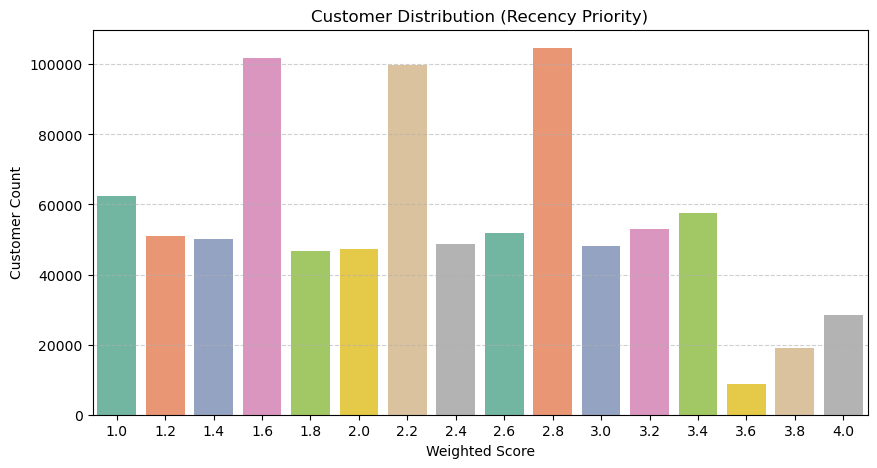

C:\Users\HP\AppData\Local\Temp\ipykernel_17460\1646995808.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=RFM_table['Frequency_Weighted'], palette='Set3')


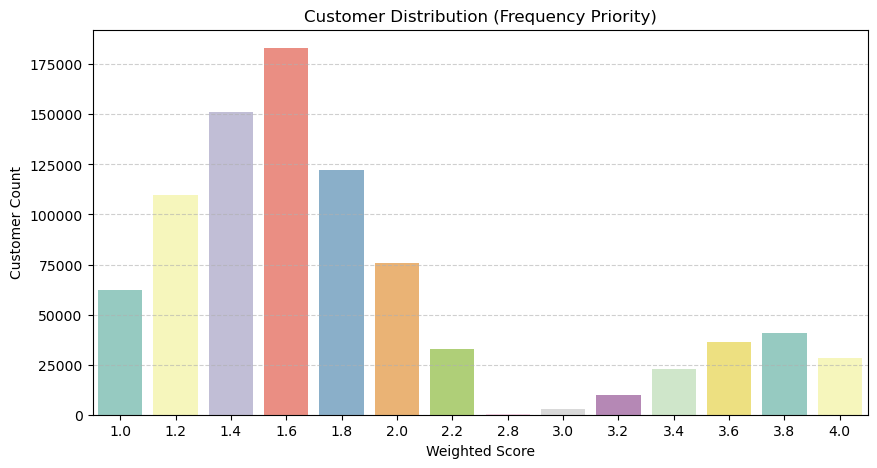

C:\Users\HP\AppData\Local\Temp\ipykernel_17460\1646995808.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=RFM_table['Monetary_Weighted'], palette='coolwarm')


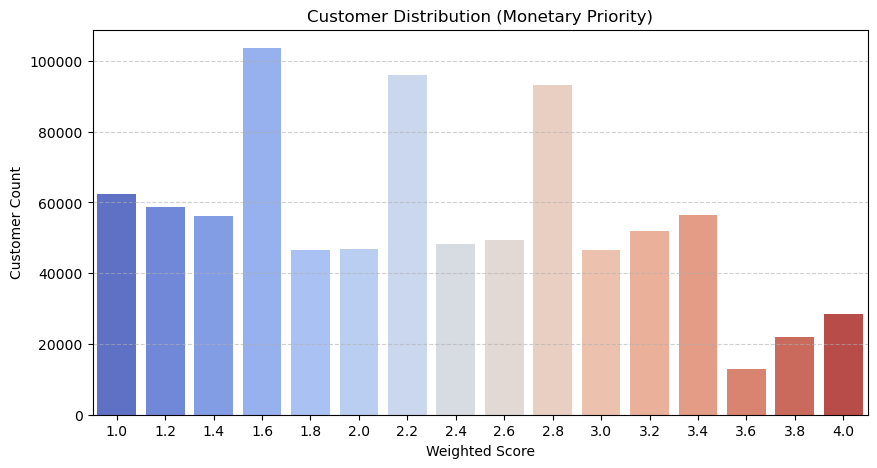

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency Priority
plt.figure(figsize=(10, 5))
sns.countplot(x=RFM_table['Recency_Weighted'], palette='Set2')
plt.title("Customer Distribution (Recency Priority)")
plt.xlabel("Weighted Score")
plt.ylabel("Customer Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Frequency Priority
plt.figure(figsize=(10, 5))
sns.countplot(x=RFM_table['Frequency_Weighted'], palette='Set3')
plt.title("Customer Distribution (Frequency Priority)")
plt.xlabel("Weighted Score")
plt.ylabel("Customer Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Monetary Priority
plt.figure(figsize=(10, 5))
sns.countplot(x=RFM_table['Monetary_Weighted'], palette='coolwarm')
plt.title("Customer Distribution (Monetary Priority)")
plt.xlabel("Weighted Score")
plt.ylabel("Customer Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Customer segmentation with K'mean

#### Import Libraries

In [175]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yellowbrick 
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.decomposition import PCA

#### Create dataframe for clustering algorithm

In [184]:
print(RFM_table.columns.tolist())


['level_0', 'old_level_0', 'index', 'CustomerID', 'Recency', 'Frequency', 'Monetary', 'Recency_Label', 'Frequency_Label', 'Monetary_Label', 'Segment_Label', 'FreqSegment', 'AvgSpendPerVisit', 'R_score', 'F_score', 'M_score', 'RFM_Score', 'M_group', 'Segment', 'CustomerValueSegment', 'Weighted_RFM_Score', 'WeightedSegment', 'Weighted_Score', 'Recency_Weighted', 'Frequency_Weighted', 'Monetary_Weighted']


In [186]:
RFM_table.columns = RFM_table.columns.str.strip()


In [187]:
required_columns = ['RFM_group', 'segments', 'weighted score', 'weightedSegment']
missing_columns = [col for col in required_columns if col not in RFM_table.columns]

if missing_columns:
    print(f"The following columns are missing: {missing_columns}")
else:
    RFM_data = RFM_table[required_columns]


The following columns are missing: ['RFM_group', 'segments', 'weighted score', 'weightedSegment']


In [188]:
RFM_data = RFM_table.get('RFM_group')


In [189]:
RFM_table.head()

,level_0,old_level_0,index,CustomerID,Recency,Frequency,Monetary,Recency_Label,Frequency_Label,Monetary_Label,...,RFM_Score,M_group,Segment,CustomerValueSegment,Weighted_RFM_Score,WeightedSegment,Weighted_Score,Recency_Weighted,Frequency_Weighted,Monetary_Weighted
0,0,0,0,C1010011,26,2,5106.0,Low,High,High,...,444,444,Top Customer,High Value,4.0,High Value,16,4.0,4.0,4.0
1,1,1,1,C1010012,69,1,1499.0,Medium,Low,Medium,...,213,213,Others,Medium Value,1.9,Low Value,8,2.0,1.6,2.4
2,2,2,2,C1010014,76,2,1455.0,High,High,Medium,...,143,143,At Risk,Medium Value,2.3,Low Value,9,2.0,3.2,2.8
3,3,3,3,C1010018,37,1,30.0,Low,Low,Low,...,411,411,Others,Low Value,2.5,Medium Value,10,2.8,1.6,1.6
4,4,4,4,C1010024,65,1,5000.0,Medium,Low,High,...,214,214,Others,High Value,2.1,Low Value,9,2.2,1.8,3.0


In [195]:
scaler = StandardScaler()

In [198]:
print(RFM_table.columns.tolist())


['level_0', 'old_level_0', 'index', 'CustomerID', 'Recency', 'Frequency', 'Monetary', 'Recency_Label', 'Frequency_Label', 'Monetary_Label', 'Segment_Label', 'FreqSegment', 'AvgSpendPerVisit', 'R_score', 'F_score', 'M_score', 'RFM_Score', 'M_group', 'Segment', 'CustomerValueSegment', 'Weighted_RFM_Score', 'WeightedSegment', 'Weighted_Score', 'Recency_Weighted', 'Frequency_Weighted', 'Monetary_Weighted']


In [199]:
'recency', 'frequency', 'monetary', 'RFM_score'


('recency', 'frequency', 'monetary', 'RFM_score')

In [200]:
RFM_numeric = RFM_table[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_score', 'F_score', 'M_score', 'RFM_Score']]
print(RFM_numeric.head())


  CustomerID  Recency  Frequency  Monetary  R_score  F_score  M_score  \
0   C1010011       26          2    5106.0        4        4        4   
1   C1010012       69          1    1499.0        2        1        3   
2   C1010014       76          2    1455.0        1        4        3   
3   C1010018       37          1      30.0        4        1        1   
4   C1010024       65          1    5000.0        2        1        4   

  RFM_Score  
0       444  
1       213  
2       143  
3       411  
4       214  


In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM_numeric.drop('CustomerID', axis=1))


In [204]:
print(scaled_data)


[[-1.99036637  1.81640799  0.45225274 ...  2.27911457  1.34206105
   1.52009401]
 [ 0.83347733 -0.41099187 -0.0495341  ... -0.43876688  0.45936444
  -0.49083717]
 [ 1.29317281  1.81640799 -0.05565515 ...  2.27911457  0.45936444
  -1.10021026]
 ...
 [ 0.57079419 -0.41099187 -0.24053863 ... -0.43876688 -1.30602876
  -0.50824783]
 [-0.08591365 -0.41099187 -0.25111135 ... -0.43876688 -1.30602876
   0.36228515]
 [-1.92469559 -0.41099187 -0.13912399 ... -0.43876688  0.45936444
   1.25022878]]


#### Implement clustering algorithm

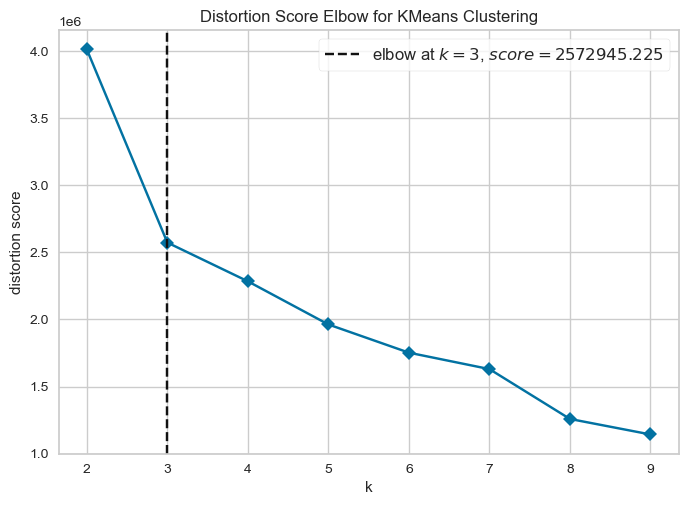

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [205]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Step 1: Define the clustering model
model = KMeans(random_state=42)

# Step 2: Create the elbow visualizer
plot_model = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

# Step 3: Fit the visualizer
plot_model.fit(scaled_data)
plot_model.show()


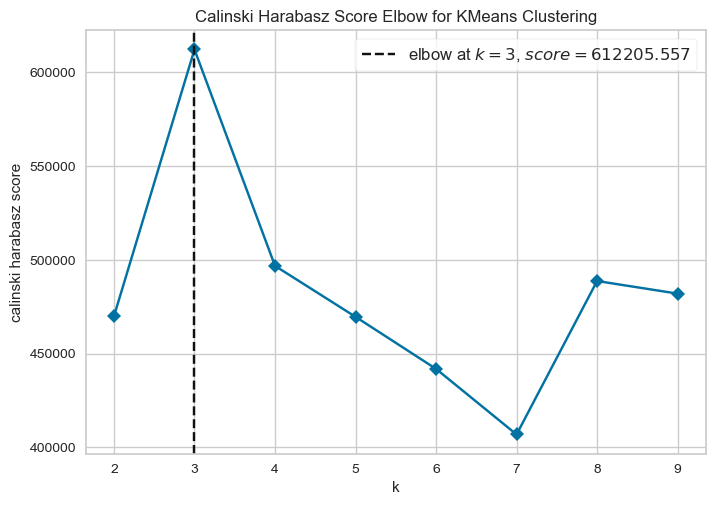

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [206]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Define the model again if needed
model = KMeans(random_state=42)

# Create the visualizer with correct metric and variable name
plot_model_2 = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

# Fit the visualizer with the correctly named data
plot_model_2.fit(scaled_data)
plot_model_2.show()


#### Cluster assignment

In [207]:
from sklearn.cluster import KMeans

final_model = KMeans(random_state=1, n_clusters=3)
final_model.fit(scaled_data)


KMeans(n_clusters=3, random_state=1)

In [208]:
cluster_assignment = final_model.labels_
cluster_assignment 

array([2, 1, 2, ..., 1, 0, 0])

In [213]:
RFM_data.loc[:, "Cluster"] = final_model.labels_


In [214]:
RFM_numeric.loc[:, "Cluster"] = final_model.labels_


In [215]:
RFM_data

,Segment_Label,Segment,Weighted_Score,WeightedSegment,Cluster
0,Low_High_High,Top Customer,16,High Value,2
1,Medium_Low_Medium,Others,8,Low Value,1
2,High_High_Medium,At Risk,9,Low Value,2
3,Low_Low_Low,Others,10,Medium Value,0
4,Medium_Low_High,Others,9,Low Value,1
...,...,...,...,...,...
879353,High_Low_Medium,At Risk,6,Low Value,1
879354,Low_Low_Medium,Others,11,Medium Value,0
879355,Medium_Low_Low,Others,6,Low Value,1
879356,Medium_Low_Low,Others,8,Low Value,0


In [217]:
print("RFM_table:", 'Cluster' in RFM_table.columns)
print("RFM_data:", 'Cluster' in RFM_data.columns)
print("RFM_numeric:", 'Cluster' in RFM_numeric.columns)


RFM_table: False
RFM_data: True
RFM_numeric: True


In [218]:
RFM_data


,Segment_Label,Segment,Weighted_Score,WeightedSegment,Cluster
0,Low_High_High,Top Customer,16,High Value,2
1,Medium_Low_Medium,Others,8,Low Value,1
2,High_High_Medium,At Risk,9,Low Value,2
3,Low_Low_Low,Others,10,Medium Value,0
4,Medium_Low_High,Others,9,Low Value,1
...,...,...,...,...,...
879353,High_Low_Medium,At Risk,6,Low Value,1
879354,Low_Low_Medium,Others,11,Medium Value,0
879355,Medium_Low_Low,Others,6,Low Value,1
879356,Medium_Low_Low,Others,8,Low Value,0


#### Vistualize cluster

In [221]:
print(RFM_data.columns.tolist())


['Segment_Label', 'Segment', 'Weighted_Score', 'WeightedSegment', 'Cluster']


C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


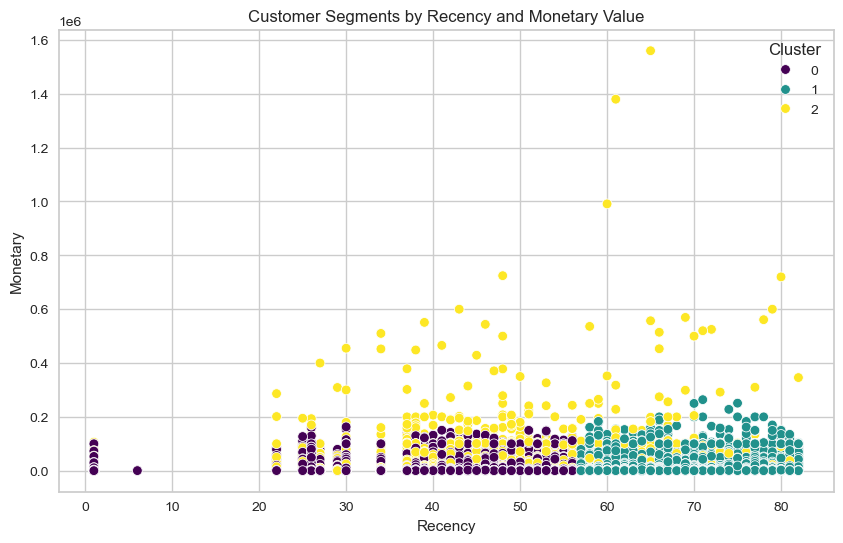

In [222]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=RFM_numeric, x="Recency", y="Monetary", hue="Cluster", palette="viridis")
plt.title("Customer Segments by Recency and Monetary Value")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


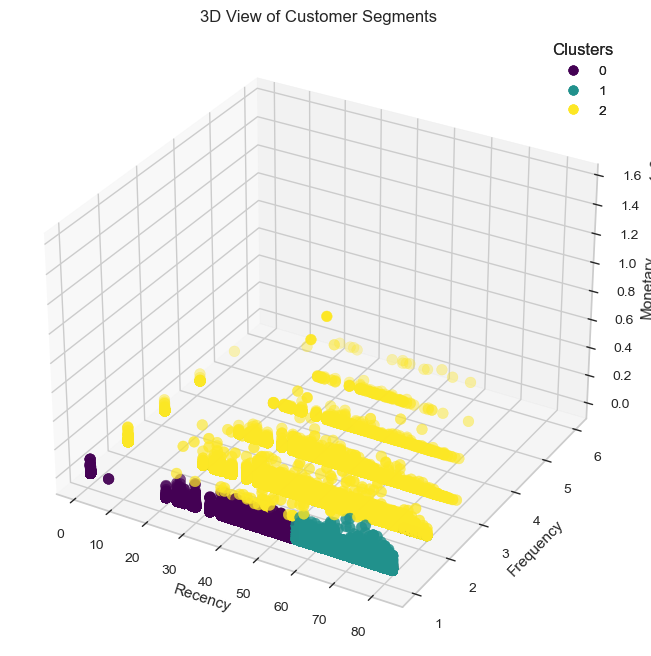

In [223]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Prepare figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter
scatter = ax.scatter(
    RFM_numeric['Recency'],
    RFM_numeric['Frequency'],
    RFM_numeric['Monetary'],
    c=RFM_numeric['Cluster'],
    cmap='viridis',
    s=60
)

# Label axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D View of Customer Segments')

# Add legend (optional)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17460\1351638014.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=RFM_numeric, x='Cluster', palette='viridis')


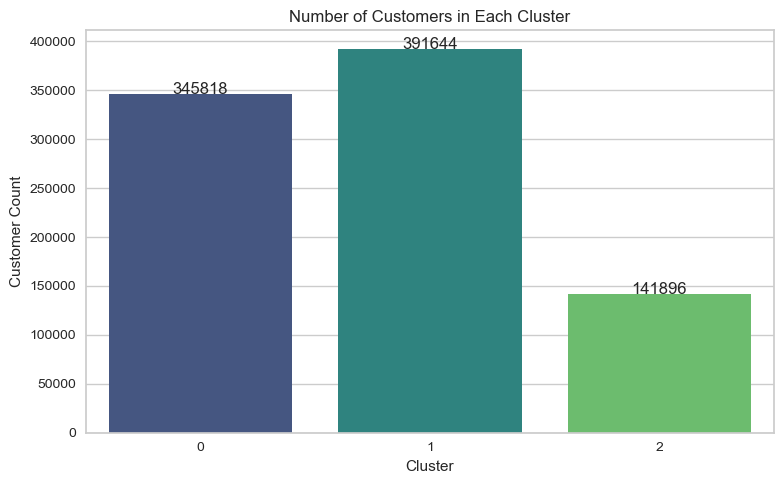

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(8, 5))

# Countplot of clusters
sns.countplot(data=RFM_numeric, x='Cluster', palette='viridis')

# Add title and labels
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Customer Count")

# Show the exact counts above the bars
cluster_counts = RFM_numeric['Cluster'].value_counts().sort_index()
for i, count in enumerate(cluster_counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [225]:
for cluster in RFM_data["Cluster"].unique():
    print(f"\n--- Statistics for Cluster {cluster} ---")
    print(RFM_data[RFM_data["Cluster"] == cluster].describe())



--- Statistics for Cluster 2 ---
       Weighted_Score   Cluster
count   141896.000000  141896.0
mean        13.393972       2.0
std          2.082655       0.0
min          7.000000       2.0
25%         12.000000       2.0
50%         14.000000       2.0
75%         15.000000       2.0
max         16.000000       2.0

--- Statistics for Cluster 1 ---
       Weighted_Score   Cluster
count   391644.000000  391644.0
mean         6.287261       1.0
std          1.490678       0.0
min          4.000000       1.0
25%          5.000000       1.0
50%          6.000000       1.0
75%          7.000000       1.0
max          9.000000       1.0

--- Statistics for Cluster 0 ---
       Weighted_Score   Cluster
count   345818.000000  345818.0
mean        10.282296       0.0
std          1.491552       0.0
min          8.000000       0.0
25%          9.000000       0.0
50%         10.000000       0.0
75%         11.000000       0.0
max         13.000000       0.0


In [227]:
cluster_0 = RFM_data[RFM_data["Cluster"] == 0]
cluster_1 = RFM_data[RFM_data["Cluster"] == 1]
cluster_2 = RFM_data[RFM_data["Cluster"] == 2]


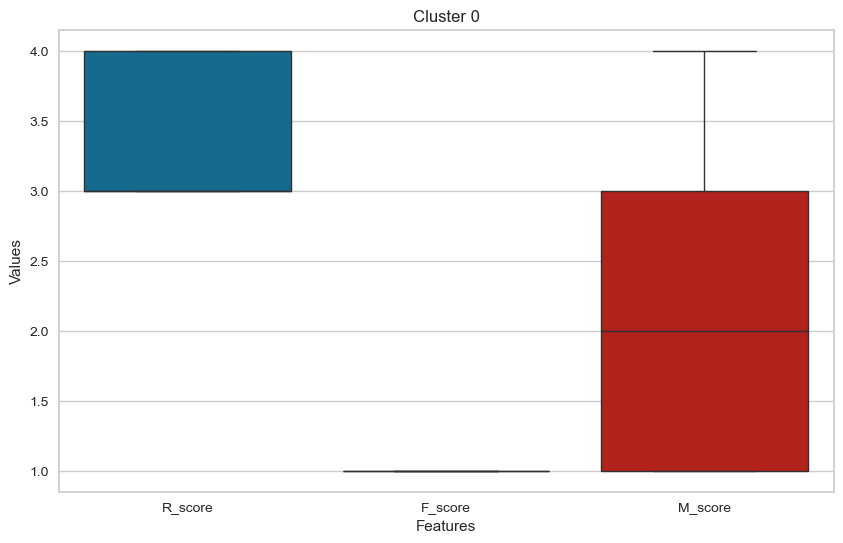

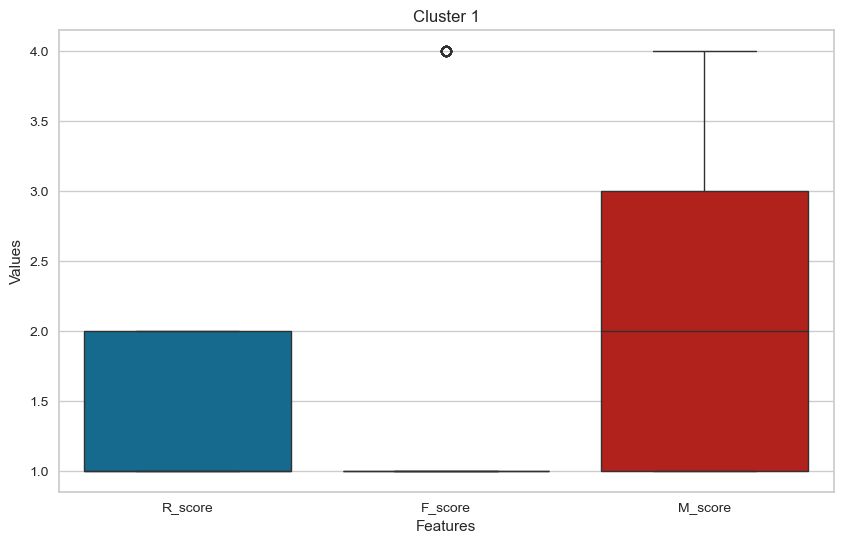

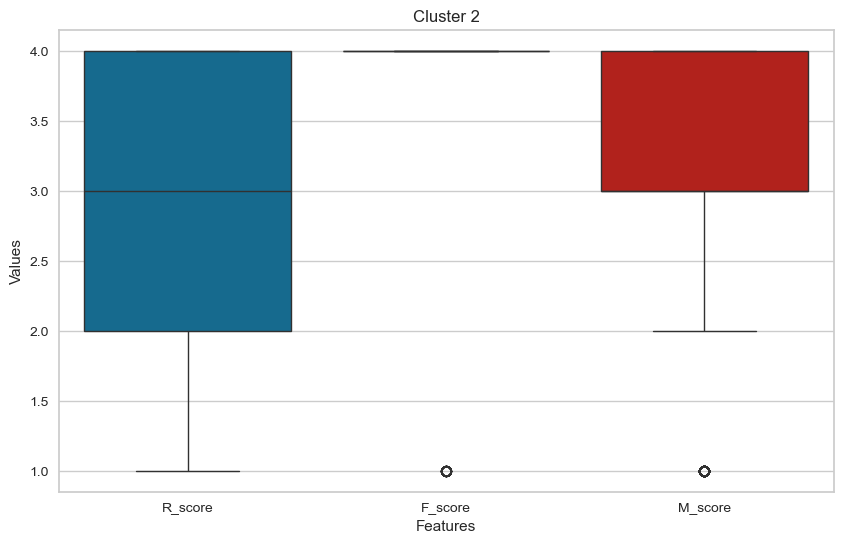

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure clusters are created from RFM_numeric
cluster_0 = RFM_numeric[RFM_numeric["Cluster"] == 0]
cluster_1 = RFM_numeric[RFM_numeric["Cluster"] == 1]
cluster_2 = RFM_numeric[RFM_numeric["Cluster"] == 2]

# Cluster 0
plt.figure(figsize=(10, 6))
sns.boxplot(data=cluster_0[["R_score", "F_score", "M_score", "RFM_Score"]])
plt.title("Cluster 0")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

# Cluster 1
plt.figure(figsize=(10, 6))
sns.boxplot(data=cluster_1[["R_score", "F_score", "M_score", "RFM_Score"]])
plt.title("Cluster 1")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

# Cluster 2
plt.figure(figsize=(10, 6))
sns.boxplot(data=cluster_2[["R_score", "F_score", "M_score", "RFM_Score"]])
plt.title("Cluster 2")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


In [234]:
rfm.to_csv("rfm_data.csv", index=False)


In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st


In [239]:
st.write("Available columns in your RFM data:")
st.write(rfm.columns.tolist())


In [241]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the RFM columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply KMeans clustering
k = st.sidebar.slider("Choose number of clusters", 2, 10, 3)
model = KMeans(n_clusters=k, random_state=42)
rfm['Cluster'] = model.fit_predict(scaled_data)


In [242]:
# Calculate RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [243]:
def assign_segment(rfm_score):
    if rfm_score == '444':
        return 'Best Customers'
    elif rfm_score[0] == '4':
        return 'Loyal Customers'
    elif rfm_score[1] == '4':
        return 'Frequent Buyers'
    elif rfm_score[2] == '4':
        return 'Big Spenders'
    elif rfm_score == '111':
        return 'Lost Customers'
    else:
        return 'Others'

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)


C:\Users\HP\AppData\Local\Temp\ipykernel_17460\1000646604.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, x='Segment', y='Count', palette='viridis', ax=ax)


DeltaGenerator()

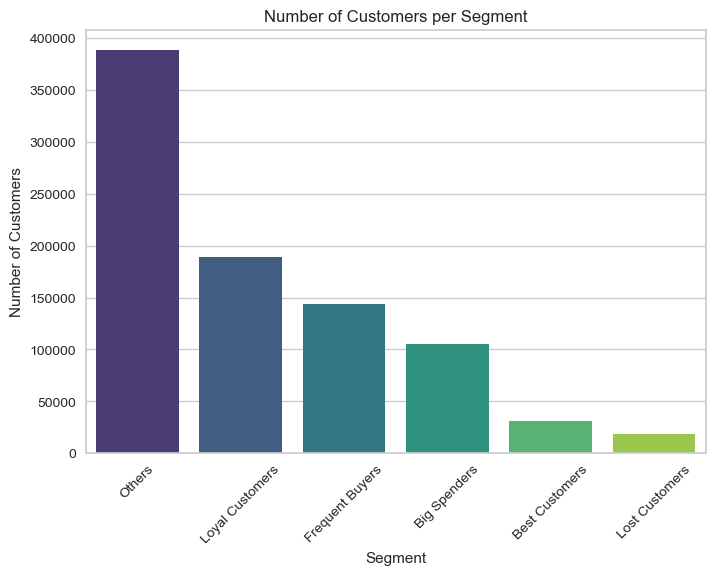

In [244]:
st.subheader("📊 Customer Segments Distribution")
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
fig, ax = plt.subplots()
sns.barplot(data=segment_counts, x='Segment', y='Count', palette='viridis', ax=ax)
ax.set_title('Number of Customers per Segment')
ax.set_xlabel('Segment')
ax.set_ylabel('Number of Customers')
plt.xticks(rotation=45)
st.pyplot(fig)


In [245]:
st.subheader("📥 Download Segmented Data")
csv = rfm.to_csv(index=False)
st.download_button(
    label="Download data as CSV",
    data=csv,
    file_name='segmented_customers.csv',
    mime='text/csv',
)


False